# **Affichage de l'image et son ground truth :**

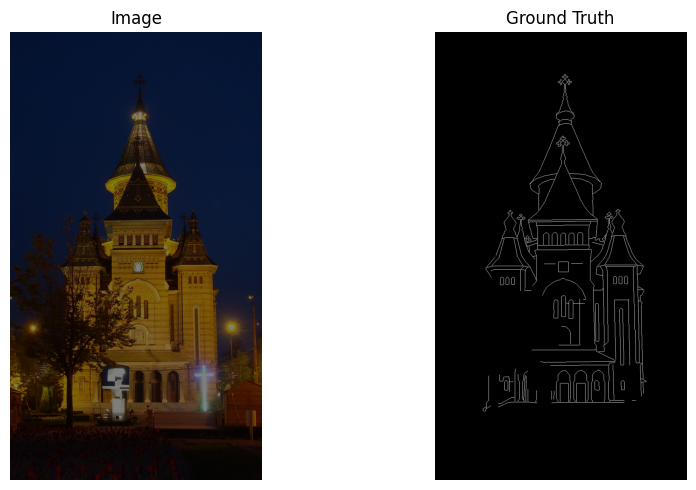

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Chemins vers les dossiers (relatifs au fichier code.ipynb)
images_dir = "./images_inter"
gt_dir = "./gt_edge_inter"

# Liste des fichiers dans chaque dossier
image_files = sorted(os.listdir(images_dir))
gt_files = sorted(os.listdir(gt_dir))

# Vérification pour s'assurer que les fichiers correspondent
if len(image_files) != len(gt_files):
    raise ValueError("Le nombre d'images et de ground truth ne correspond pas.")

# Lecture de la première image et de son GT
img_file = image_files[0]
gt_file = gt_files[0]

# Construction des chemins complets
img_path = os.path.join(images_dir, img_file)
gt_path = os.path.join(gt_dir, gt_file)

# Ouverture des images
image = Image.open(img_path).convert("RGB")  # Convertir en RGB si nécessaire
gt_image = Image.open(gt_path).convert("L")  # Convertir en niveaux de gris si GT est binaire

# Affichage dans un bloc de code
plt.figure(figsize=(10, 5))

# Affichage de l'image originale
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Image")
plt.axis("off")

# Affichage de l'image GT
plt.subplot(1, 2, 2)
plt.imshow(gt_image, cmap="gray")
plt.title("Ground Truth")
plt.axis("off")

plt.tight_layout()
plt.show()


# **Pré-traitement :**

## **Augmentation de données : Rotation (90, 180, 170)**

In [4]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Chemins vers les dossiers (relatifs au fichier code.ipynb)
images_dir = "./images_inter"
gt_dir = "./gt_edge_inter"
aug_images_dir = "./aug_images_inter"
aug_gt_dir = "./aug_gt_edge_inter"

# Créer des dossiers pour stocker les images augmentées
os.makedirs(aug_images_dir, exist_ok=True)
os.makedirs(aug_gt_dir, exist_ok=True)

# Liste des fichiers dans chaque dossier
image_files = sorted(os.listdir(images_dir))
gt_files = sorted(os.listdir(gt_dir))

# Vérification pour s'assurer que les fichiers correspondent
if len(image_files) != len(gt_files):
    raise ValueError("Le nombre d'images et de ground truth ne correspond pas.")

# Fonction pour effectuer des rotations
angles = [90, 180, 270]

def augment_and_save(image, gt_image, base_name, output_dir_images, output_dir_gt):
    """Augmente une image et son GT avec des rotations."""
    for angle in angles:
        # Rotation de l'image
        rotated_image = image.rotate(angle)
        rotated_gt = gt_image.rotate(angle)

        # Noms de fichiers pour les images augmentées
        img_aug_name = f"{base_name}_rot{angle}.png"
        gt_aug_name = f"{base_name}_rot{angle}.png"

        # Sauvegarder les images
        rotated_image.save(os.path.join(output_dir_images, img_aug_name))
        rotated_gt.save(os.path.join(output_dir_gt, gt_aug_name))

# Parcourir les images et appliquer l'augmentation
for img_file, gt_file in zip(image_files, gt_files):
    # Construction des chemins complets
    img_path = os.path.join(images_dir, img_file)
    gt_path = os.path.join(gt_dir, gt_file)

    # Ouverture des images
    image = Image.open(img_path).convert("RGB")
    gt_image = Image.open(gt_path).convert("L")

    # Nom de base pour les images augmentées
    base_name = os.path.splitext(img_file)[0]

    # Sauvegarde des images originales
    image.save(os.path.join(aug_images_dir, f"{base_name}.png"))
    gt_image.save(os.path.join(aug_gt_dir, f"{base_name}.png"))

    # Appliquer les augmentations
    augment_and_save(image, gt_image, base_name, aug_images_dir, aug_gt_dir)

print("Augmentation terminée. Les images sont enregistrées dans les dossiers augmentés.")


Augmentation terminée. Les images sont enregistrées dans les dossiers augmentés.


## **Augmentation de données : Miroir horizontal et vertical**

Après l'application de rotation et miroir, on obtient 960 images dans Ground Truth et dans les images

In [5]:
# Fonction pour effectuer des miroirs
def mirror_and_save(image, gt_image, base_name, output_dir_images, output_dir_gt):
    """Applique un miroir horizontal et vertical sur l'image et son GT."""
    # Miroir horizontal
    mirrored_image_h = image.transpose(Image.FLIP_LEFT_RIGHT)
    mirrored_gt_h = gt_image.transpose(Image.FLIP_LEFT_RIGHT)
    
    # Miroir vertical
    mirrored_image_v = image.transpose(Image.FLIP_TOP_BOTTOM)
    mirrored_gt_v = gt_image.transpose(Image.FLIP_TOP_BOTTOM)

    # Noms de fichiers pour les images miroir
    img_mirrored_h_name = f"{base_name}_flip_h.png"
    gt_mirrored_h_name = f"{base_name}_flip_h.png"
    img_mirrored_v_name = f"{base_name}_flip_v.png"
    gt_mirrored_v_name = f"{base_name}_flip_v.png"

    # Sauvegarder les images miroir
    mirrored_image_h.save(os.path.join(output_dir_images, img_mirrored_h_name))
    mirrored_gt_h.save(os.path.join(output_dir_gt, gt_mirrored_h_name))
    
    mirrored_image_v.save(os.path.join(output_dir_images, img_mirrored_v_name))
    mirrored_gt_v.save(os.path.join(output_dir_gt, gt_mirrored_v_name))

# Appliquer l'augmentation miroir sur les images augmentées
for img_file, gt_file in zip(image_files, gt_files):
    # Construction des chemins complets
    img_path = os.path.join(aug_images_dir, img_file)
    gt_path = os.path.join(aug_gt_dir, gt_file)

    # Ouverture des images
    image = Image.open(img_path).convert("RGB")
    gt_image = Image.open(gt_path).convert("L")

    # Nom de base pour les images augmentées
    base_name = os.path.splitext(img_file)[0]

    # Appliquer les augmentations miroir
    mirror_and_save(image, gt_image, base_name, aug_images_dir, aug_gt_dir)

print("Augmentation miroir terminée. Les images miroir sont enregistrées dans les dossiers augmentés.")


Augmentation miroir terminée. Les images miroir sont enregistrées dans les dossiers augmentés.


## **Standardisation : Transformation des images en gris**

In [2]:
import os
import pandas as pd
from PIL import Image

# Chemins vers les dossiers contenant les images et le GT
aug_images_dir = "./aug_images_inter"
aug_gt_dir = "./aug_gt_edge_inter"

# Liste des fichiers dans les dossiers
image_files = sorted(os.listdir(aug_images_dir))
gt_files = sorted(os.listdir(aug_gt_dir))

# Vérification pour s'assurer que les fichiers correspondent
if len(image_files) != len(gt_files):
    raise ValueError("Le nombre d'images et de ground truth ne correspond pas.")

# Création des DataFrames pour stocker les chemins d'images et de GT
image_data = []
gt_data = []

# Remplir les DataFrames avec les chemins des fichiers
for img_file, gt_file in zip(image_files, gt_files):
    img_path = os.path.join(aug_images_dir, img_file)
    gt_path = os.path.join(aug_gt_dir, gt_file)
    
    # Ajout des chemins d'images et de GT dans les listes
    image_data.append({"filename": img_file, "filepath": img_path})
    gt_data.append({"filename": gt_file, "filepath": gt_path})

# Créer les DataFrames
images_df = pd.DataFrame(image_data)
gt_df = pd.DataFrame(gt_data)

# Afficher les DataFrames pour vérification
print("DataFrame des images:")
print(images_df.head())

print("\nDataFrame des GT:")
print(gt_df.head())


DataFrame des images:
           filename                             filepath
0         00001.png         ./aug_images_inter\00001.png
1  00001_flip_h.png  ./aug_images_inter\00001_flip_h.png
2  00001_flip_v.png  ./aug_images_inter\00001_flip_v.png
3  00001_rot180.png  ./aug_images_inter\00001_rot180.png
4  00001_rot270.png  ./aug_images_inter\00001_rot270.png

DataFrame des GT:
           filename                              filepath
0         00001.png         ./aug_gt_edge_inter\00001.png
1  00001_flip_h.png  ./aug_gt_edge_inter\00001_flip_h.png
2  00001_flip_v.png  ./aug_gt_edge_inter\00001_flip_v.png
3  00001_rot180.png  ./aug_gt_edge_inter\00001_rot180.png
4  00001_rot270.png  ./aug_gt_edge_inter\00001_rot270.png


In [3]:
import random


DataFrame avec images en gris:
           filename                             filepath  \
0         00001.png         ./aug_images_inter\00001.png   
1  00001_flip_h.png  ./aug_images_inter\00001_flip_h.png   
2  00001_flip_v.png  ./aug_images_inter\00001_flip_v.png   
3  00001_rot180.png  ./aug_images_inter\00001_rot180.png   
4  00001_rot270.png  ./aug_images_inter\00001_rot270.png   

                                          gray_image  
0  <PIL.Image.Image image mode=L size=720x1280 at...  
1  <PIL.Image.Image image mode=L size=720x1280 at...  
2  <PIL.Image.Image image mode=L size=720x1280 at...  
3  <PIL.Image.Image image mode=L size=720x1280 at...  
4  <PIL.Image.Image image mode=L size=720x1280 at...  


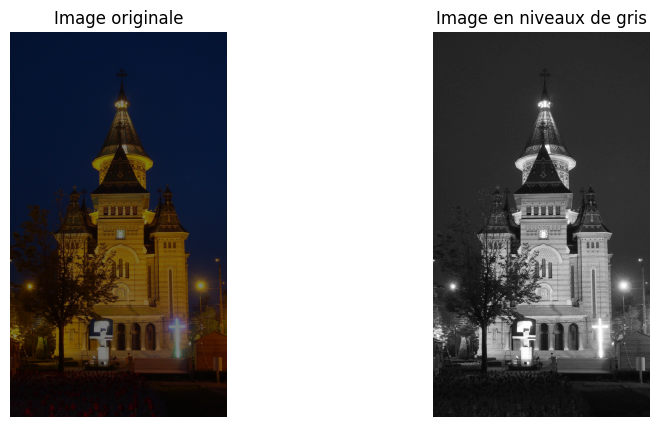

In [4]:
from PIL import Image

# Fonction pour convertir une image en niveaux de gris
def convert_to_gray(image_path):
    """Convertir une image en niveaux de gris."""
    image = Image.open(image_path).convert("L")
    return image

# Appliquer la conversion en niveaux de gris à chaque image du DataFrame
images_df['gray_image'] = images_df['filepath'].apply(convert_to_gray)

# Afficher le DataFrame pour vérifier l'ajout de la colonne
print("DataFrame avec images en gris:")
print(images_df.head())

# Exemple d'affichage d'une image originale et de son équivalent en gris
import matplotlib.pyplot as plt

# Sélectionner la première image (index 0)
first_image_path = images_df.loc[0, 'filepath']
first_gray_image = images_df.loc[0, 'gray_image']

# Ouvrir l'image originale
original_image = Image.open(first_image_path)

# Affichage
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Image originale
axes[0].imshow(original_image)
axes[0].set_title("Image originale")
axes[0].axis('off')

# Image en niveaux de gris
axes[1].imshow(first_gray_image, cmap='gray')
axes[1].set_title("Image en niveaux de gris")
axes[1].axis('off')

# Afficher les images
plt.show()


## **Extraction des caractéristiques**

### **Histogramme :**

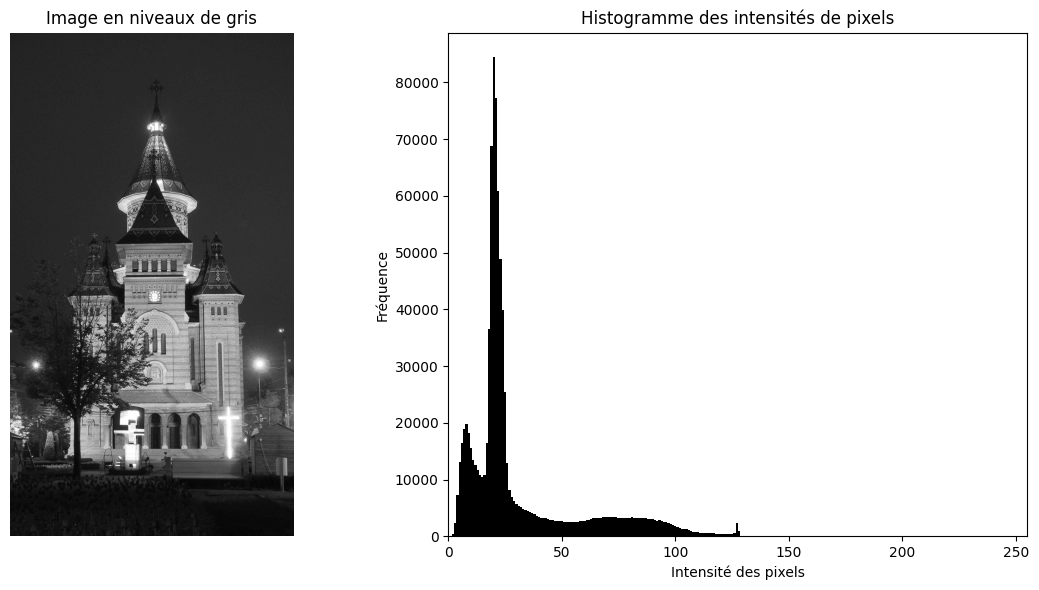

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

# Fonction pour obtenir l'histogramme d'une image
def get_histogram(image):
    """Retourne l'histogramme d'une image en niveaux de gris."""
    return image.histogram()

# Sélectionner la première image (index 0)
first_gray_image = images_df.loc[0, 'gray_image']  # Image en gris

# Calculer l'histogramme de l'image en gris
hist = get_histogram(first_gray_image)

# Afficher l'image en niveaux de gris et son histogramme
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Image en niveaux de gris
axes[0].imshow(first_gray_image, cmap='gray')
axes[0].set_title("Image en niveaux de gris")
axes[0].axis('off')

# Histogramme
axes[1].bar(range(256), hist, width=1, color='black')  # Tracer l'histogramme
axes[1].set_title("Histogramme des intensités de pixels")
axes[1].set_xlabel("Intensité des pixels")
axes[1].set_ylabel("Fréquence")
axes[1].set_xlim(0, 255)  # Limiter l'axe des x de 0 à 255

# Afficher les résultats
plt.tight_layout()
plt.show()


In [8]:
!pip install scikit-image


  Using cached scikit_image-0.25.0-cp313-cp313-win_amd64.whl.metadata (14 kB)
Using cached scikit_image-0.25.0-cp313-cp313-win_amd64.whl (12.9 MB)


In [9]:
pip show scikit-image


Name: scikit-image
Version: 0.25.0
Summary: Image processing in Python
Home-page: https://scikit-image.org
Author: 
Author-email: 
License: Files: *
 Copyright: 2009-2022 the scikit-image team
 License: BSD-3-Clause

 Files: doc/source/themes/scikit-image/layout.html
 Copyright: 2007-2010 the Sphinx team
 License: BSD-3-Clause

 Files: skimage/feature/_canny.py
        skimage/filters/edges.py
        skimage/filters/_rank_order.py
        skimage/morphology/_skeletonize.py
        skimage/morphology/tests/test_watershed.py
        skimage/morphology/watershed.py
        skimage/segmentation/heap_general.pxi
        skimage/segmentation/heap_watershed.pxi
        skimage/segmentation/_watershed.py
        skimage/segmentation/_watershed_cy.pyx
 Copyright: 2003-2009 Massachusetts Institute of Technology
            2009-2011 Broad Institute
            2003 Lee Kamentsky
            2003-2005 Peter J. Verveer
 License: BSD-3-Clause

 Files: skimage/filters/thresholding.py
        skimag

### **LBP :**

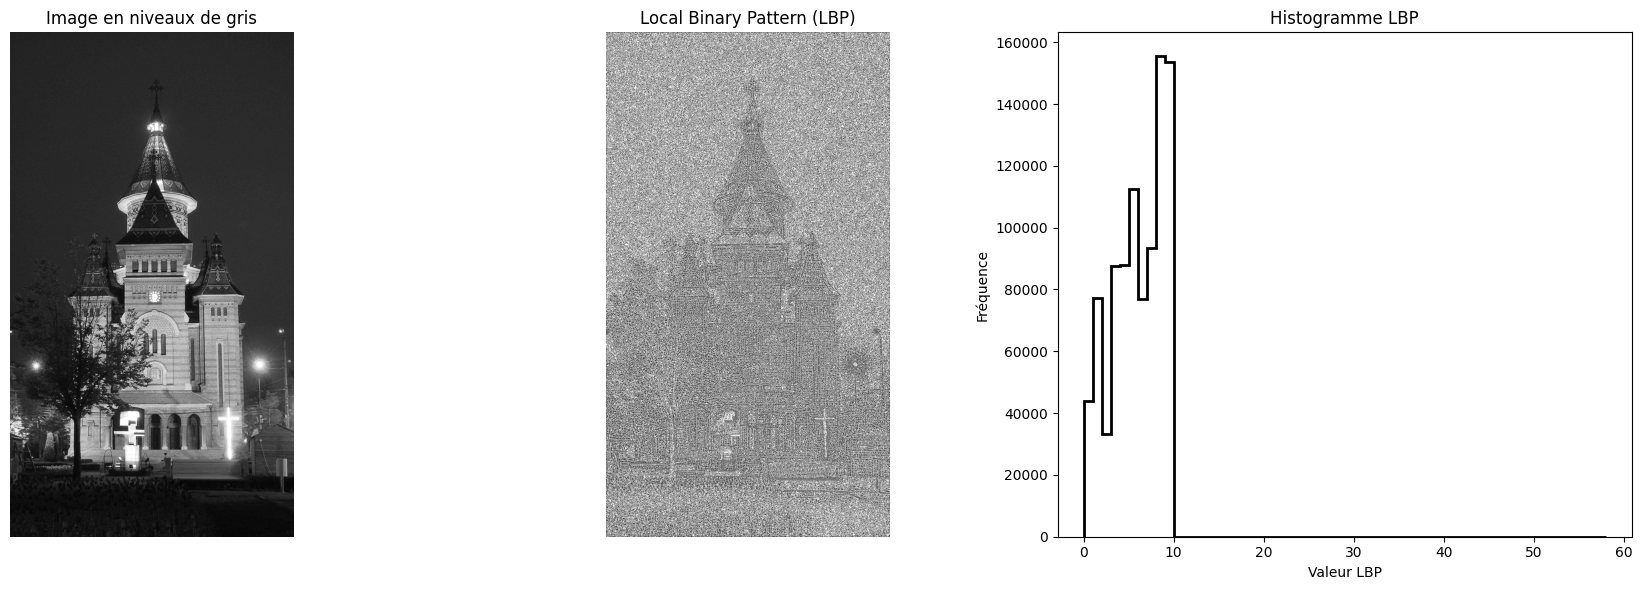

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from skimage.feature import local_binary_pattern

# Fonction pour obtenir le LBP d'une image
def get_lbp(image, radius=1, n_points=8):
    """Retourne le LBP (Local Binary Pattern) d'une image en niveaux de gris."""
    # Assurez-vous que l'image est un tableau numpy (2D)
    if isinstance(image, Image.Image):
        image = np.array(image.convert('L'))  # Conversion en niveaux de gris (L) si c'est une image PIL
    # Calculer le LBP
    lbp = local_binary_pattern(image, n_points, radius, method='uniform')
    return lbp

# Sélectionner la première image (index 0)
first_gray_image = images_df.loc[0, 'gray_image']  # Image en gris

# Calculer le LBP de l'image en gris
lbp_image = get_lbp(first_gray_image)

# Afficher l'image en niveaux de gris, le LBP et son histogramme
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Image en niveaux de gris
axes[0].imshow(first_gray_image, cmap='gray')
axes[0].set_title("Image en niveaux de gris")
axes[0].axis('off')

# Image LBP
axes[1].imshow(lbp_image, cmap='gray')
axes[1].set_title("Local Binary Pattern (LBP)")
axes[1].axis('off')

# Histogramme du LBP
axes[2].hist(lbp_image.ravel(), bins=np.arange(0, 59), color='black', histtype='step', lw=2)
axes[2].set_title("Histogramme LBP")
axes[2].set_xlabel("Valeur LBP")
axes[2].set_ylabel("Fréquence")

# Afficher les résultats
plt.tight_layout()
plt.show()


## **Pipeline de pré-traitement : filtrage, seuillage, contraste**

### **Utilisation de Reinfocement Learning :**

C:\Users\admin\AppData\Local\Temp\ipykernel_12968\3072997378.py:28: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  histogram, _ = np.histogram(image, bins=256, range=(0, 255))
C:\Users\admin\AppData\Local\Temp\ipykernel_12968\3072997378.py:29: RuntimeWarning: invalid value encountered in divide
  histogram = histogram / histogram.sum()  # Normalisation


Meilleur ordre trouvé : [('filtering', 'median'), ('thresholding', 'otsu'), ('contrast', 'hist_eq')]
Récompense associée : 630.4510238018872


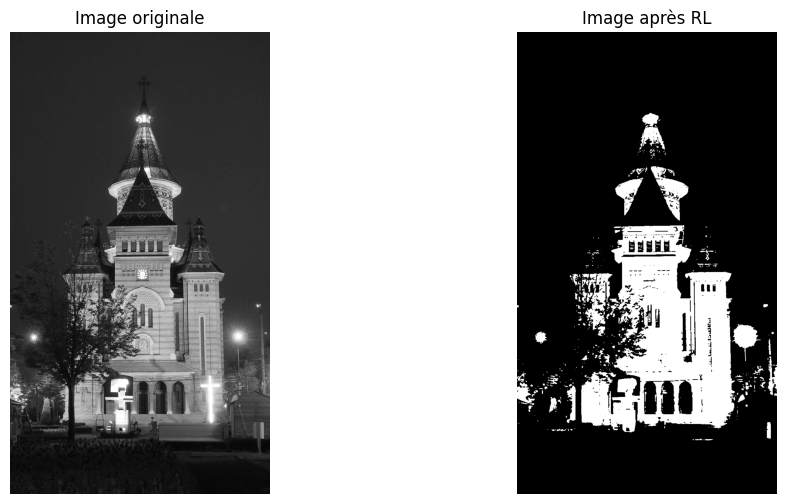

In [92]:
# Méthode mise à jour pour choisir une action avec des probabilités biaisées
def choose_action(self, available_steps):
    """
    Choisir une action parmi les étapes disponibles, avec des probabilités biaisées.
    """
    step = random.choice(available_steps)
    
    # Définir des poids pour les méthodes préférées
    if step == 'filtering':
        methods = self.methods[step]
        probabilities = [0.2 if method != 'median' else 0.8 for method in methods]
    elif step == 'thresholding':
        methods = self.methods[step]
        probabilities = [0.1 if method != 'otsu' else 0.9 for method in methods]
    elif step == 'contrast':
        methods = self.methods[step]
        probabilities = [0.2 if method != 'hist_eq' else 0.8 for method in methods]
    
    # Normaliser les probabilités pour s'assurer qu'elles forment une distribution valide
    probabilities = np.array(probabilities)
    probabilities /= probabilities.sum()
    
    # Choisir une méthode basée sur les probabilités pondérées
    method = random.choices(methods, weights=probabilities, k=1)[0]
    return step, method

# Mettre à jour la classe pour inclure cette méthode
ImagePreprocessingEnv.choose_action = choose_action

# Charger la première image
image_path = images_df.iloc[0]['filepath']
image = load_image(image_path)

# Initialiser l'environnement
env = ImagePreprocessingEnv(image)

# Simulation RL avec inclusion obligatoire des 3 étapes
best_order = None
best_reward = -np.inf
best_image1 = None
threshold_reward = 1000  # Seuil de récompense pour un bon résultat

for episode in range(50):  # Nombre d'épisodes
    state = env.reset()
    actions = []
    cumulative_reward = 0

    # Étapes disponibles (filtrage, seuillage, contraste)
    remaining_steps = env.steps[:]
    for _ in range(len(env.steps)):
        action = env.choose_action(remaining_steps)  # Choisir une action valide
        actions.append(action)
        next_state, reward = env.step(action)
        cumulative_reward += reward
        remaining_steps.remove(action[0])  # Retirer l'étape de la liste pour éviter les doublons

    # Si la récompense est supérieure à la meilleure récompense obtenue, sauvegardez l'image
    if cumulative_reward > best_reward:
        best_reward = cumulative_reward
        best_order = actions[:]
        best_image1 = env.current_image.copy()

    # Si la récompense dépasse un seuil, on arrête l'apprentissage
    if cumulative_reward >= threshold_reward:
        print(f"Seuil de récompense atteint à l'épisode {episode}.")
        break

# Résultats
print(f"Meilleur ordre trouvé : {best_order}")
print(f"Récompense associée : {best_reward}")

# Afficher les images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Image originale")
axes[0].axis('off')

axes[1].imshow(best_image1, cmap='gray')
axes[1].set_title("Image après RL")
axes[1].axis('off')

plt.show()


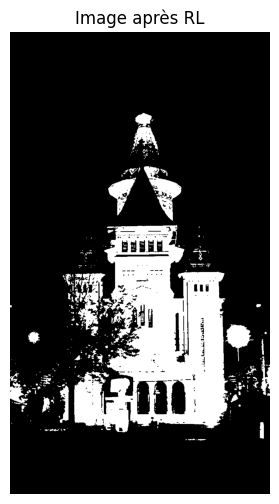

In [93]:
# Afficher l'image résultante après RL
fig, ax = plt.subplots(figsize=(6, 6))  # Crée un graphique de taille 6x6 pouces
ax.imshow(best_image1, cmap='gray')  # Affiche l'image avec une palette de gris
ax.set_title("Image après RL")  # Ajoute un titre
ax.axis('off')  # Désactive l'axe
plt.show()  # Affiche le graphique


In [95]:
# Vérifier si l'image est de type float et la convertir en uint8
if best_image1.dtype != np.uint8:
    best_image1 = (best_image1 * 255).astype(np.uint8)

# Enregistrer l'image résultante dans un fichier
output_image_path = "./best_image_after_rl1.png"
Image.fromarray(best_image1).save(output_image_path)

# Afficher un message indiquant où le fichier a été enregistré
print(f"L'image résultante a été enregistrée à : {output_image_path}")


L'image résultante a été enregistrée à : ./best_image_after_rl1.png


# **Traitement : segmentation par contour**

## **Utilisation de Machine Learning : Regression linéaire**

C:\Users\admin\AppData\Local\Temp\ipykernel_12968\1038945045.py:35: UserWarning: Inputs have mismatched dtypes. Setting data_range based on im1.dtype.
  return ssim(gt_image, pred_image)


Meilleurs paramètres Canny prédits : seuil bas = 0.8906626246435451, seuil haut = 0.8906626246435451


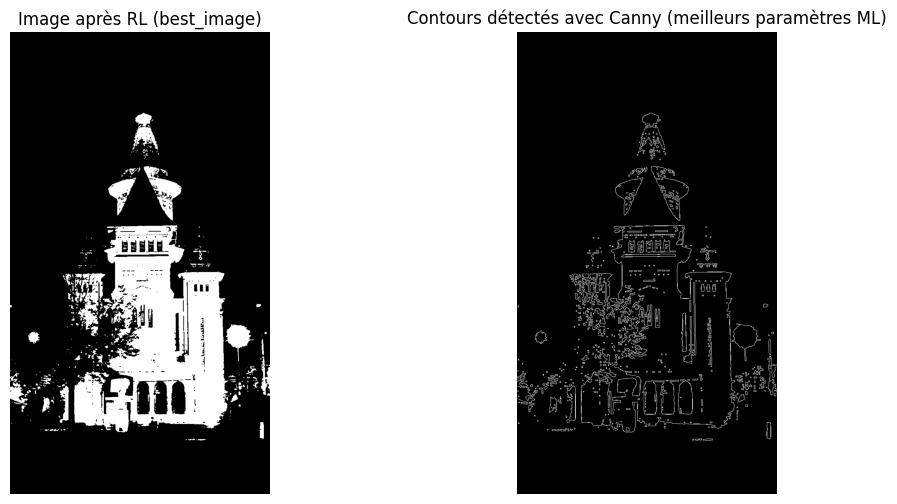

L'image des contours a été enregistrée à : C:/Users/admin/Desktop/important/traitement d'image/PROJET/SUR GR/best_edge_image_with_canny1.png


In [96]:
import numpy as np
import pandas as pd
import os
import random
from skimage import feature
from skimage.feature import canny
from skimage.metrics import structural_similarity as ssim
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from PIL import Image

# Chemins vers les dossiers contenant les images
aug_images_dir = "./aug_images_inter"
aug_gt_dir = "./aug_gt_edge_inter"

# Liste des fichiers dans le dossier d'images
image_files = sorted(os.listdir(aug_images_dir))
gt_files = sorted(os.listdir(aug_gt_dir))

# Création du DataFrame pour stocker les chemins d'images
image_data = [{"filename": img, "filepath": os.path.join(aug_images_dir, img)} for img in image_files]
images_df = pd.DataFrame(image_data)

# Fonction pour charger les images
def load_image(image_path):
    return np.array(Image.open(image_path).convert('L'))  # Convertir en niveaux de gris

# Fonction pour appliquer Canny avec des seuils spécifiques
def apply_canny(image, low_threshold, high_threshold):
    return feature.canny(image / 255.0, low_threshold=low_threshold / 255.0, high_threshold=high_threshold / 255.0)

# Fonction de récompense basée sur la similarité de contours
def contour_quality(gt_image, pred_image):
    # Calculer le SSIM (Structural Similarity Index) entre l'image GT et l'image prédite
    return ssim(gt_image, pred_image)

# Préparer les données d'entraînement pour ML
X_train = []  # Paramètres Canny
y_train = []  # Scores de qualité des contours

# Charger l'image best_image
best_image_path = "C:/Users/admin/Desktop/important/traitement d'image/PROJET/SUR GR/best_image_after_rl1.png"
best_image1 = load_image(best_image_path)

# Charger l'image GT
gt_image_path = os.path.join(aug_gt_dir, gt_files[0])  # Première image de GT
gt_image = load_image(gt_image_path)

# Essayer plusieurs combinaisons de seuils Canny pour déterminer les meilleurs
low_thresholds = [50, 100, 150, 200]
high_thresholds = [100, 150, 200, 250]

# Entraînement du modèle
for low_threshold in low_thresholds:
    for high_threshold in high_thresholds:
        if low_threshold < high_threshold:
            # Appliquer Canny sur l'image best_image avec les seuils actuels
            pred_image = apply_canny(best_image1, low_threshold, high_threshold)

            # Calculer la qualité du contour (récompense) en comparant avec l'image GT
            quality_score = contour_quality(gt_image, pred_image)
            
            # Ajouter les paramètres Canny et la qualité du contour dans les données d'entraînement
            X_train.append([low_threshold, high_threshold])
            y_train.append(quality_score)

# Convertir les données d'entraînement en tableaux numpy
X_train = np.array(X_train)
y_train = np.array(y_train)

# Entraîner un modèle de régression linéaire pour prédire les meilleurs paramètres Canny
model = LinearRegression()
model.fit(X_train, y_train)

# Prédiction des meilleurs paramètres
best_params = model.predict([[100, 150]])  # Exemple de prédiction pour une nouvelle image

# Récupérer les paramètres prévus à partir de la prédiction
best_low_threshold, best_high_threshold = best_params[0], best_params[0]

print(f"Meilleurs paramètres Canny prédits : seuil bas = {best_low_threshold}, seuil haut = {best_high_threshold}")

# Appliquer l'algorithme Canny avec les meilleurs paramètres trouvés
best_pred_image = apply_canny(best_image1, best_low_threshold, best_high_threshold)

# Afficher les images : image initiale après RL (best_image) et l'image résultante après application de Canny avec ML
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(best_image1, cmap='gray')
axes[0].set_title("Image après RL (best_image)")
axes[0].axis('off')

axes[1].imshow(best_pred_image, cmap='gray')
axes[1].set_title("Contours détectés avec Canny (meilleurs paramètres ML)")
axes[1].axis('off')

plt.show()

# Sauvegarder l'image des contours
output_edge_image_path = "C:/Users/admin/Desktop/important/traitement d'image/PROJET/SUR GR/best_edge_image_with_canny1.png"
Image.fromarray((best_pred_image * 255).astype(np.uint8)).save(output_edge_image_path)
print(f"L'image des contours a été enregistrée à : {output_edge_image_path}")


# **Post-traitement : morphologie mathématique**

## **Elément structurant : carré**

C:\Users\admin\AppData\Local\Temp\ipykernel_12968\3639374087.py:15: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  kernel = morphology.square(kernel_size)  # Noyau carré


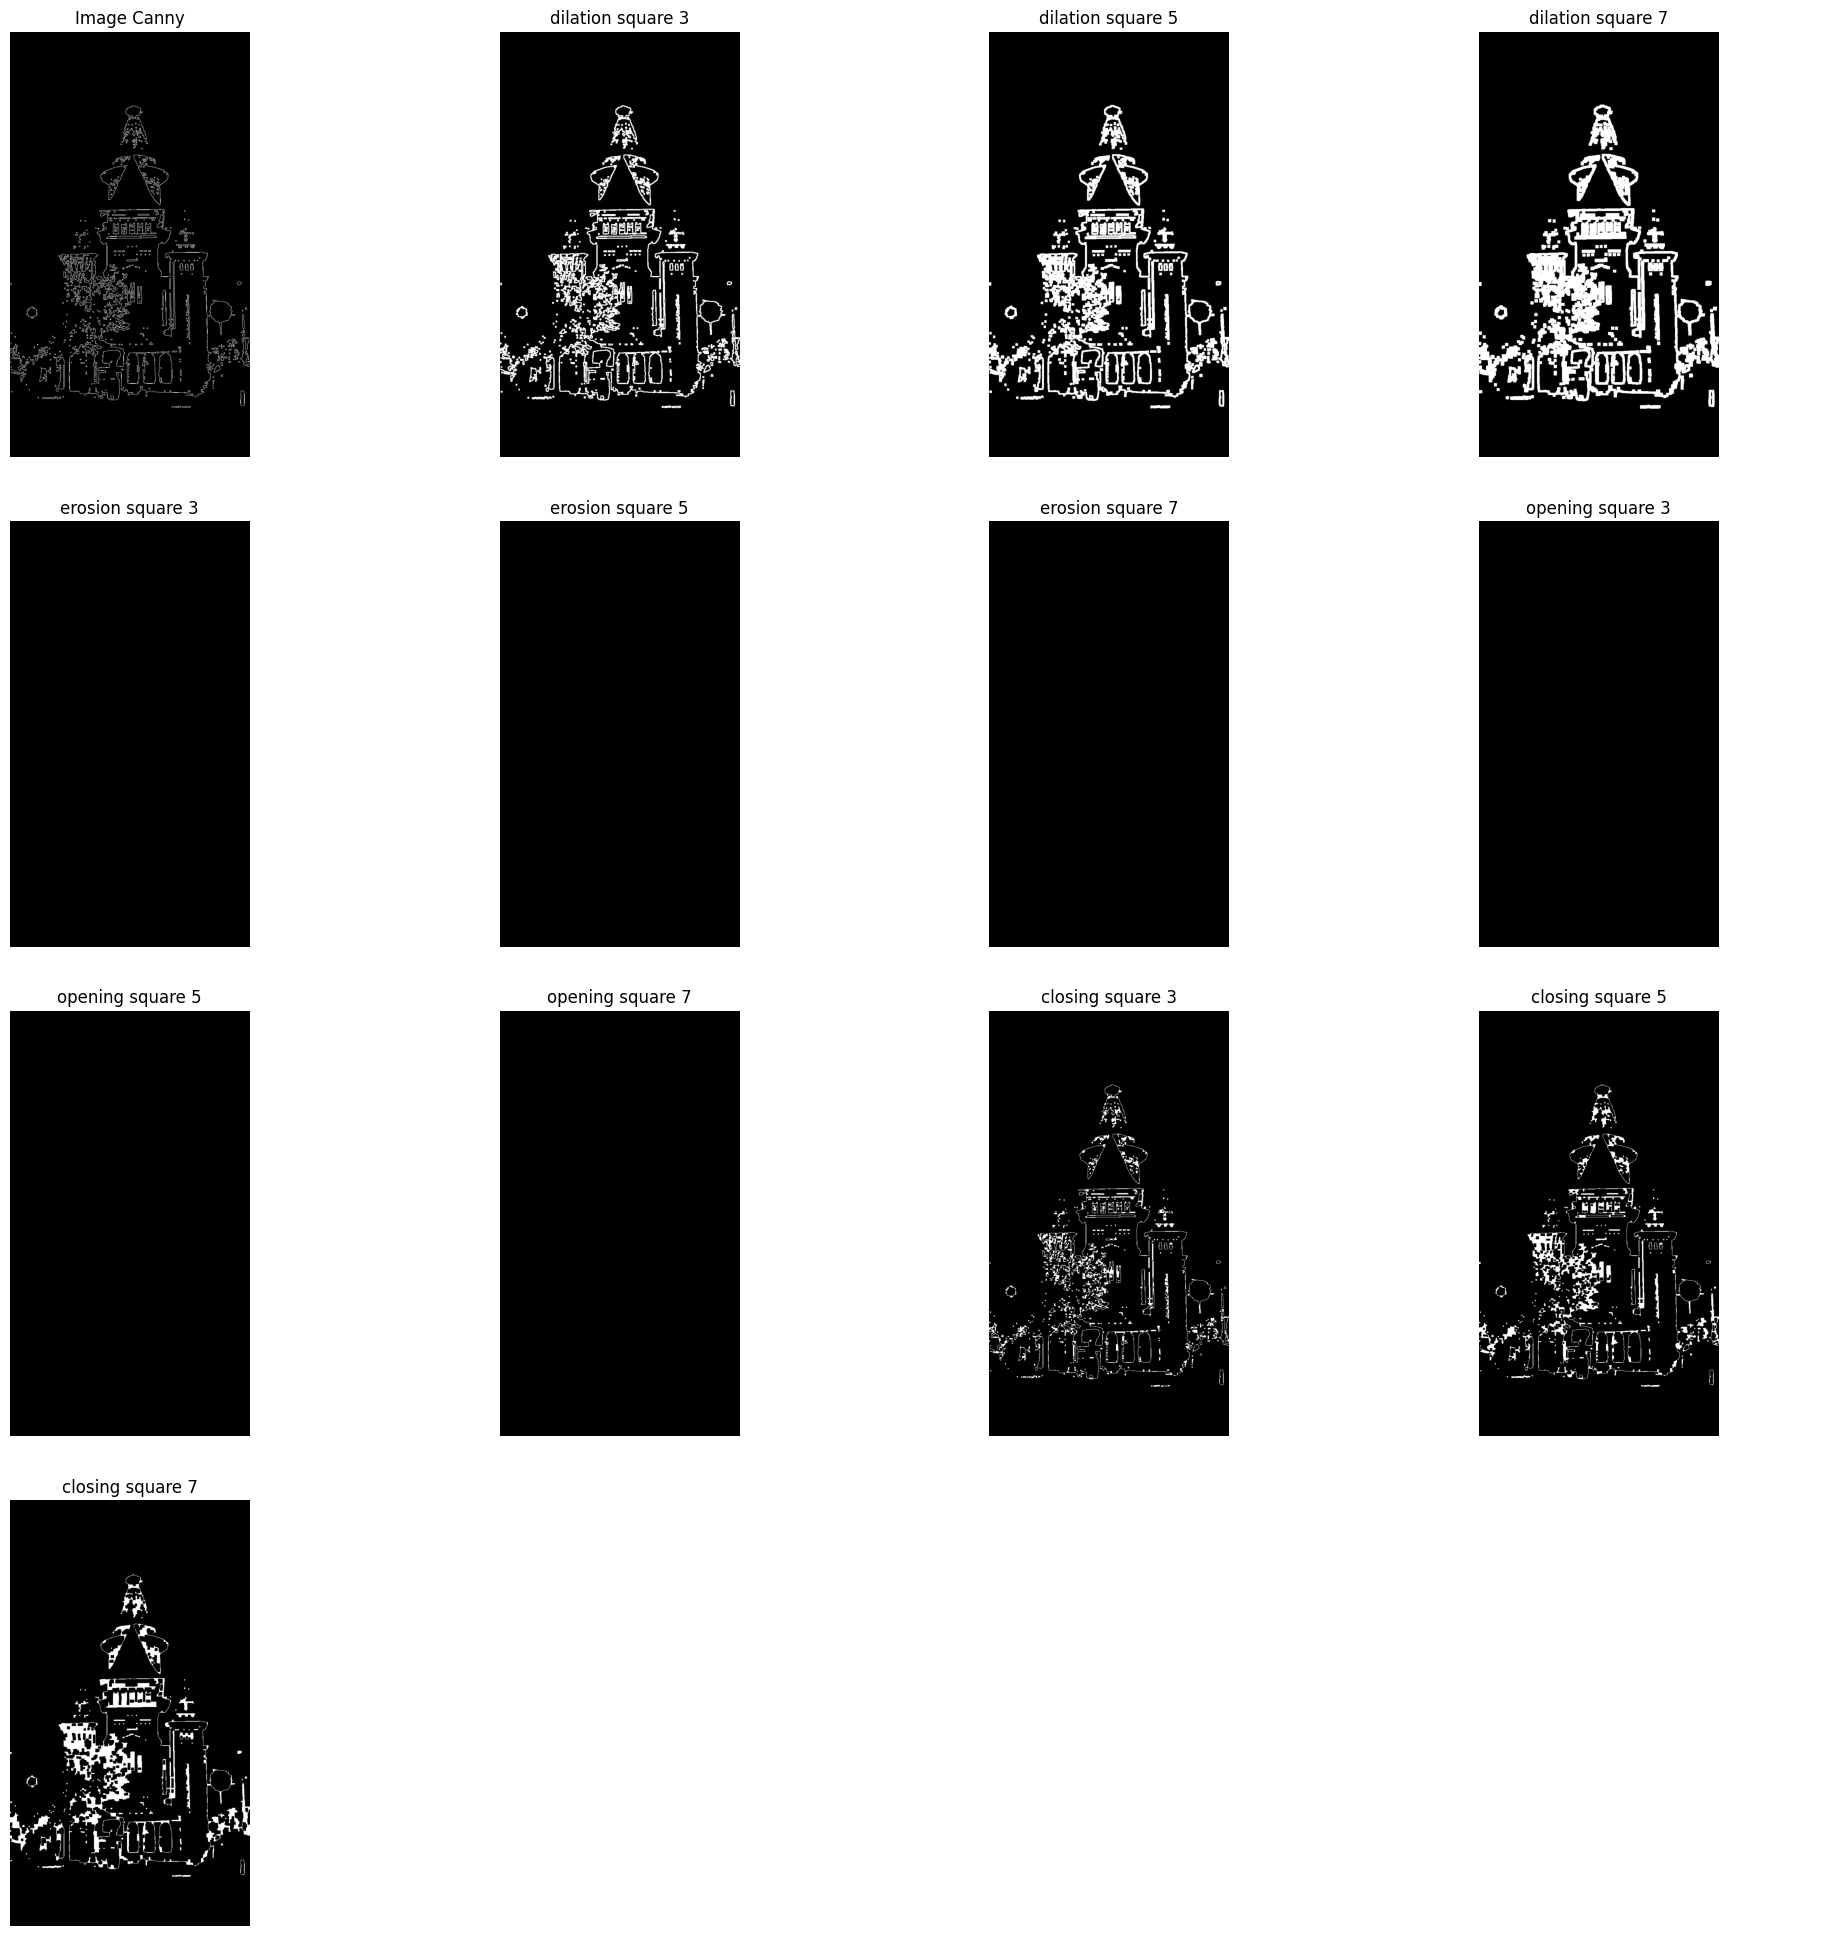

In [97]:
import numpy as np
import os
from skimage import morphology
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image

# Fonction pour charger l'image
def load_image(image_path):
    return np.array(Image.open(image_path).convert('L'))  # Convertir en niveaux de gris

# Appliquer des opérations morphologiques avec un noyau carré
def apply_morphology(image, operation="dilation", kernel_size=3):
    """Appliquer une opération morphologique avec un noyau carré"""
    kernel = morphology.square(kernel_size)  # Noyau carré

    if operation == "dilation":
        return morphology.dilation(image, footprint=kernel)
    elif operation == "erosion":
        return morphology.erosion(image, footprint=kernel)
    elif operation == "opening":
        return morphology.opening(image, footprint=kernel)
    elif operation == "closing":
        return morphology.closing(image, footprint=kernel)
    else:
        return image

# Charger l'image Canny (résultante de Canny)
canny_image_path = "C:/Users/admin/Desktop/important/traitement d'image/PROJET/SUR GR/best_edge_image_with_canny1.png"
canny_image = load_image(canny_image_path)

# Liste des opérations morphologiques
morph_operations = ["dilation", "erosion", "opening", "closing"]

# Liste des tailles de noyaux (nous n'utilisons que square)
kernel_sizes = [3, 5, 7]

# Appliquer toutes les opérations morphologiques avec le noyau carré
result_images = []
for operation in morph_operations:
    for size in kernel_sizes:
        result_image = apply_morphology(canny_image, operation, size)
        result_images.append((operation, size, result_image))

# Calculer le nombre de lignes nécessaire pour afficher toutes les images
num_images = len(result_images) + 1  # +1 pour l'image Canny
num_cols = 4  # Nombre d'images par ligne
num_rows = (num_images // num_cols) + (num_images % num_cols > 0)  # Calculer le nombre de lignes

# Affichage de toutes les images avec 4 images par ligne
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))  # Dynamiser la taille en fonction du nombre de lignes
axes = axes.ravel()  # Aplatir les axes pour un accès facile

# Afficher l'image Canny et toutes les images morphologiques
axes[0].imshow(canny_image, cmap='gray')
axes[0].set_title("Image Canny")
axes[0].axis('off')

# Afficher les résultats morphologiques
for i, (operation, size, result_image) in enumerate(result_images):
    axes[i + 1].imshow(result_image, cmap='gray')
    axes[i + 1].set_title(f"{operation} square {size}")
    axes[i + 1].axis('off')

# Supprimer les axes vides s'il y en a
for i in range(len(result_images) + 1, len(axes)):
    axes[i].axis('off')

# Ajuster les marges pour que les titres et les images soient bien visibles
plt.tight_layout(pad=3.0)  # Augmenter l'espacement entre les images
plt.show()


## **Elément structurant : cercle**

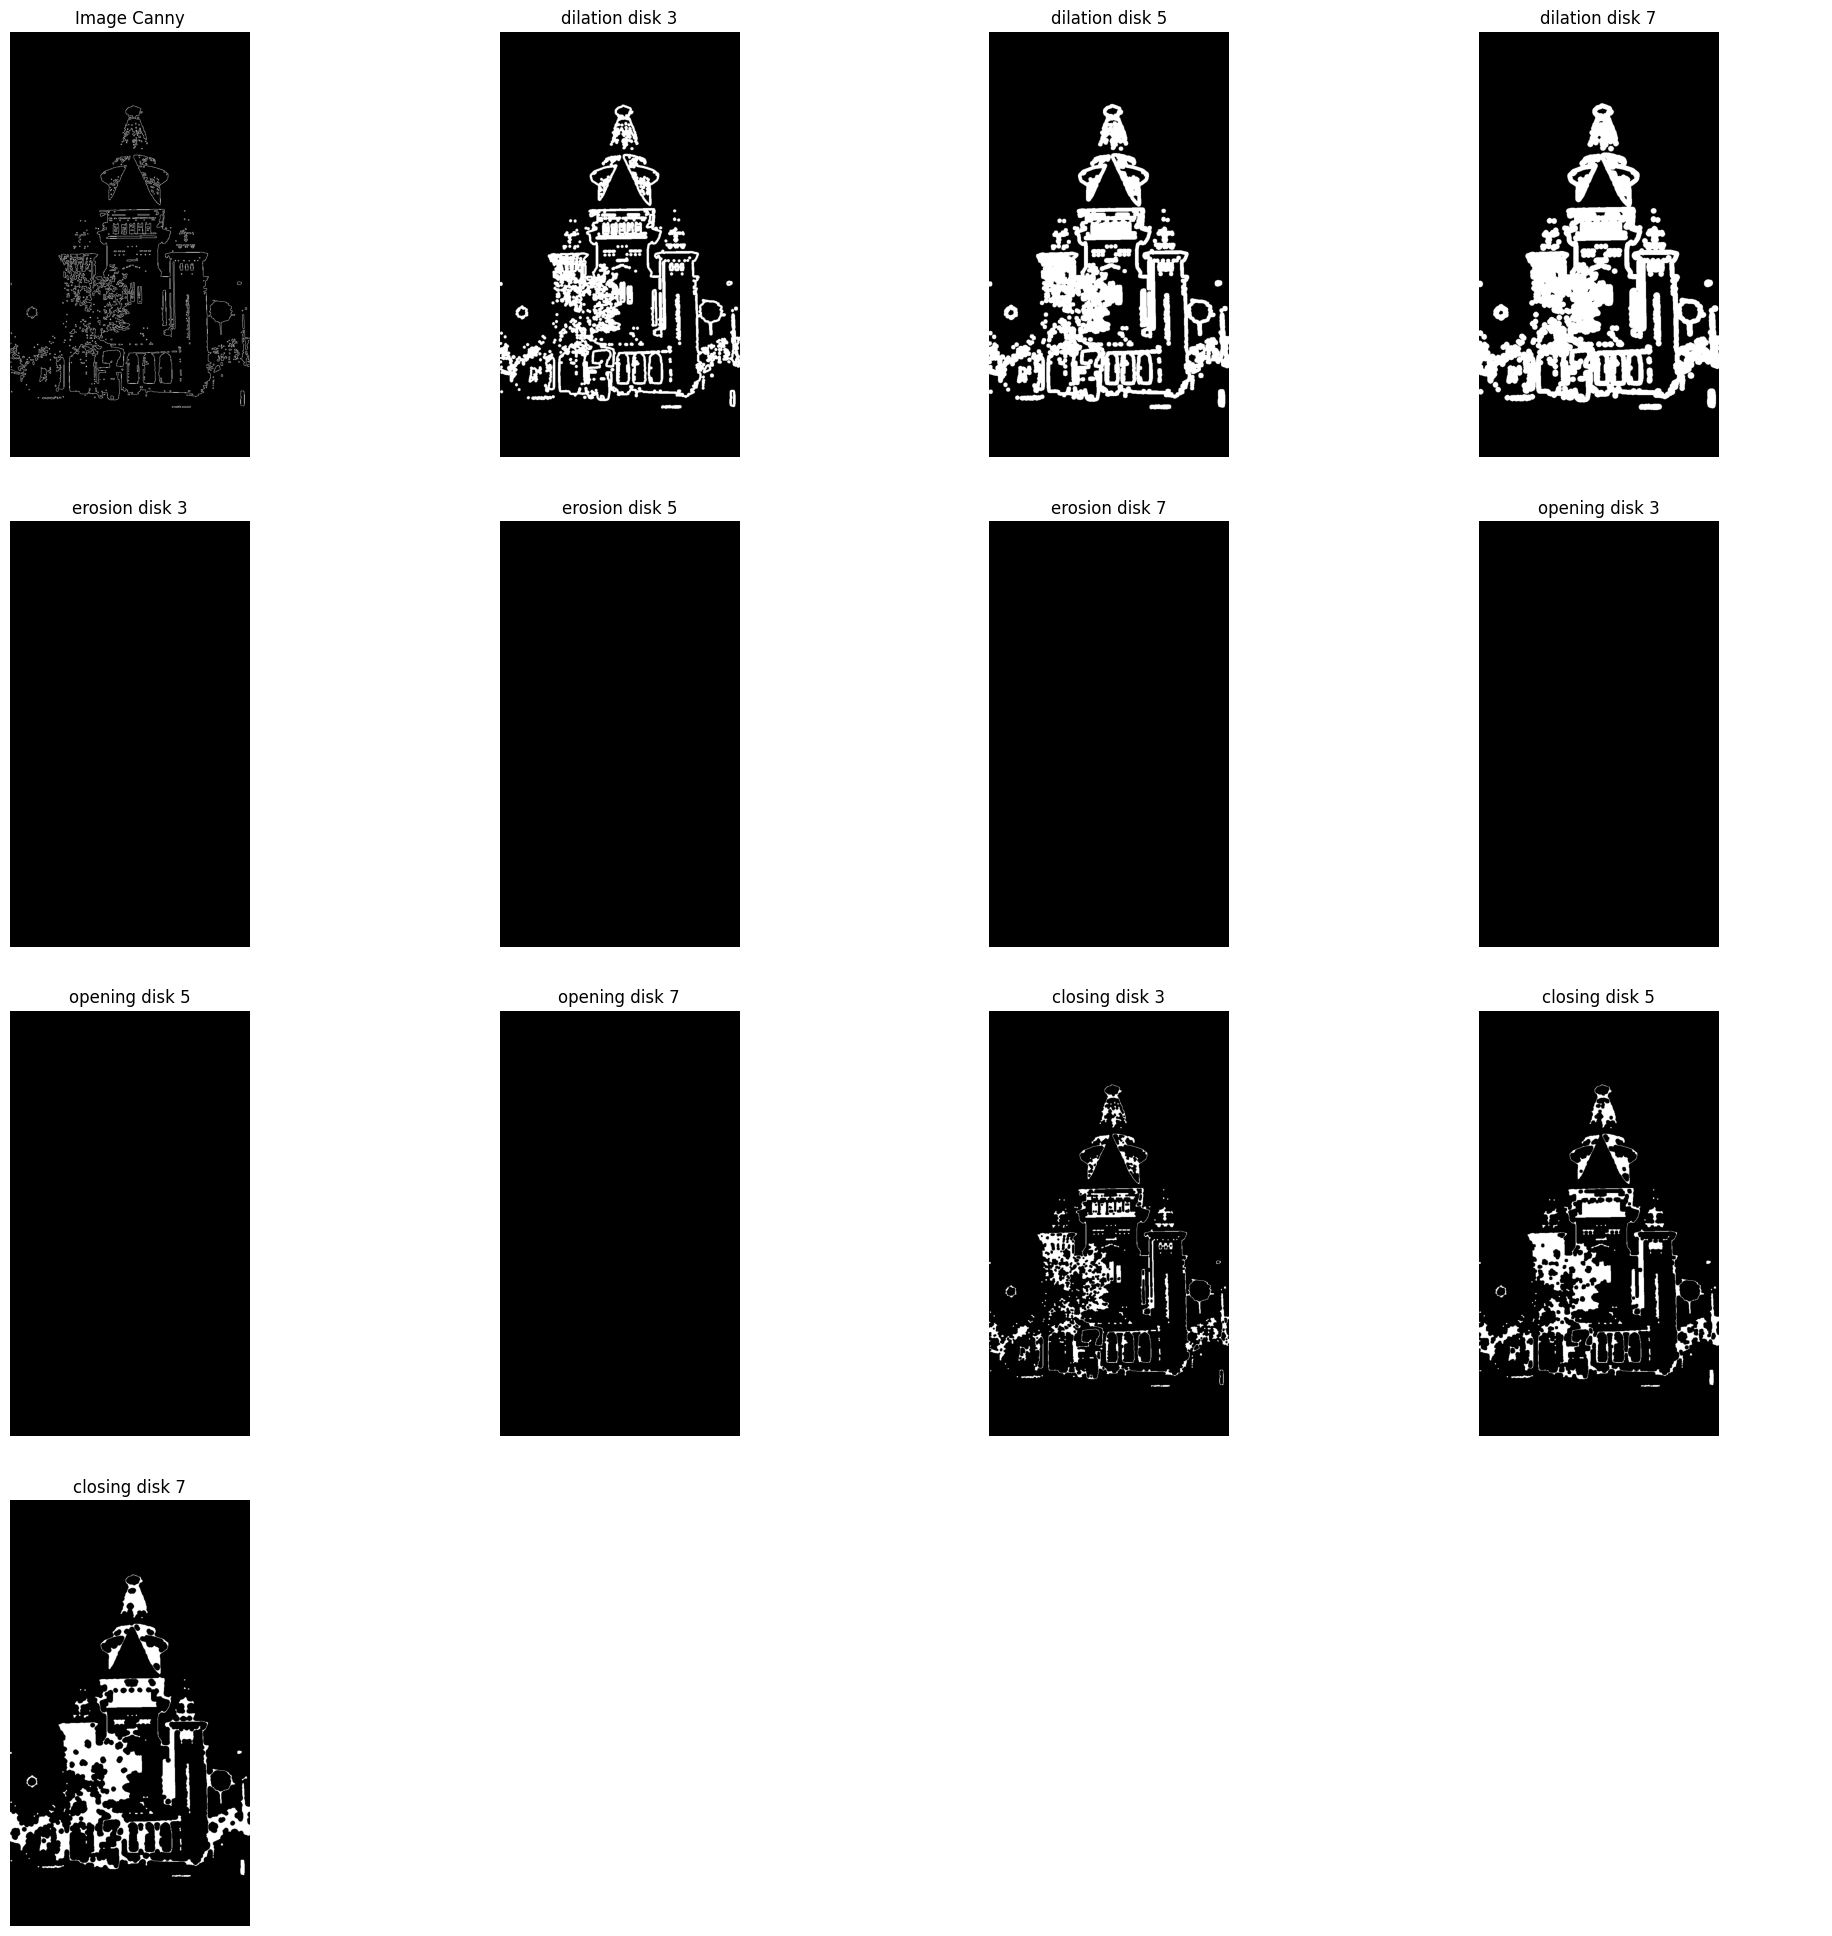

In [98]:
import numpy as np
import os
from skimage import morphology
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image

# Fonction pour charger l'image
def load_image(image_path):
    return np.array(Image.open(image_path).convert('L'))  # Convertir en niveaux de gris

# Appliquer des opérations morphologiques avec un noyau circulaire
def apply_morphology(image, operation="dilation", kernel_size=3):
    """Appliquer une opération morphologique avec un noyau circulaire"""
    kernel = morphology.disk(kernel_size)  # Noyau circulaire

    if operation == "dilation":
        return morphology.dilation(image, footprint=kernel)
    elif operation == "erosion":
        return morphology.erosion(image, footprint=kernel)
    elif operation == "opening":
        return morphology.opening(image, footprint=kernel)
    elif operation == "closing":
        return morphology.closing(image, footprint=kernel)
    else:
        return image

# Charger l'image Canny (résultante de Canny)
canny_image_path = "C:/Users/admin/Desktop/important/traitement d'image/PROJET/SUR GR/best_edge_image_with_canny1.png"
canny_image = load_image(canny_image_path)

# Liste des opérations morphologiques
morph_operations = ["dilation", "erosion", "opening", "closing"]

# Liste des tailles de noyaux (nous utilisons des noyaux circulaires)
kernel_sizes = [3, 5, 7]

# Appliquer toutes les opérations morphologiques avec le noyau circulaire
result_images = []
for operation in morph_operations:
    for size in kernel_sizes:
        result_image = apply_morphology(canny_image, operation, size)
        result_images.append((operation, size, result_image))

# Calculer le nombre de lignes nécessaire pour afficher toutes les images
num_images = len(result_images) + 1  # +1 pour l'image Canny
num_cols = 4  # Nombre d'images par ligne
num_rows = (num_images // num_cols) + (num_images % num_cols > 0)  # Calculer le nombre de lignes

# Affichage de toutes les images avec 4 images par ligne
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))  # Dynamiser la taille en fonction du nombre de lignes
axes = axes.ravel()  # Aplatir les axes pour un accès facile

# Afficher l'image Canny et toutes les images morphologiques
axes[0].imshow(canny_image, cmap='gray')
axes[0].set_title("Image Canny")
axes[0].axis('off')

# Afficher les résultats morphologiques
for i, (operation, size, result_image) in enumerate(result_images):
    axes[i + 1].imshow(result_image, cmap='gray')
    axes[i + 1].set_title(f"{operation} disk {size}")
    axes[i + 1].axis('off')

# Supprimer les axes vides s'il y en a
for i in range(len(result_images) + 1, len(axes)):
    axes[i].axis('off')

# Ajuster les marges pour que les titres et les images soient bien visibles
plt.tight_layout(pad=3.0)  # Augmenter l'espacement entre les images
plt.show()


## **Elément structurant : rectangle**

C:\Users\admin\AppData\Local\Temp\ipykernel_12968\2758666610.py:15: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  kernel = morphology.rectangle(kernel_size[0], kernel_size[1])  # Noyau rectangulaire


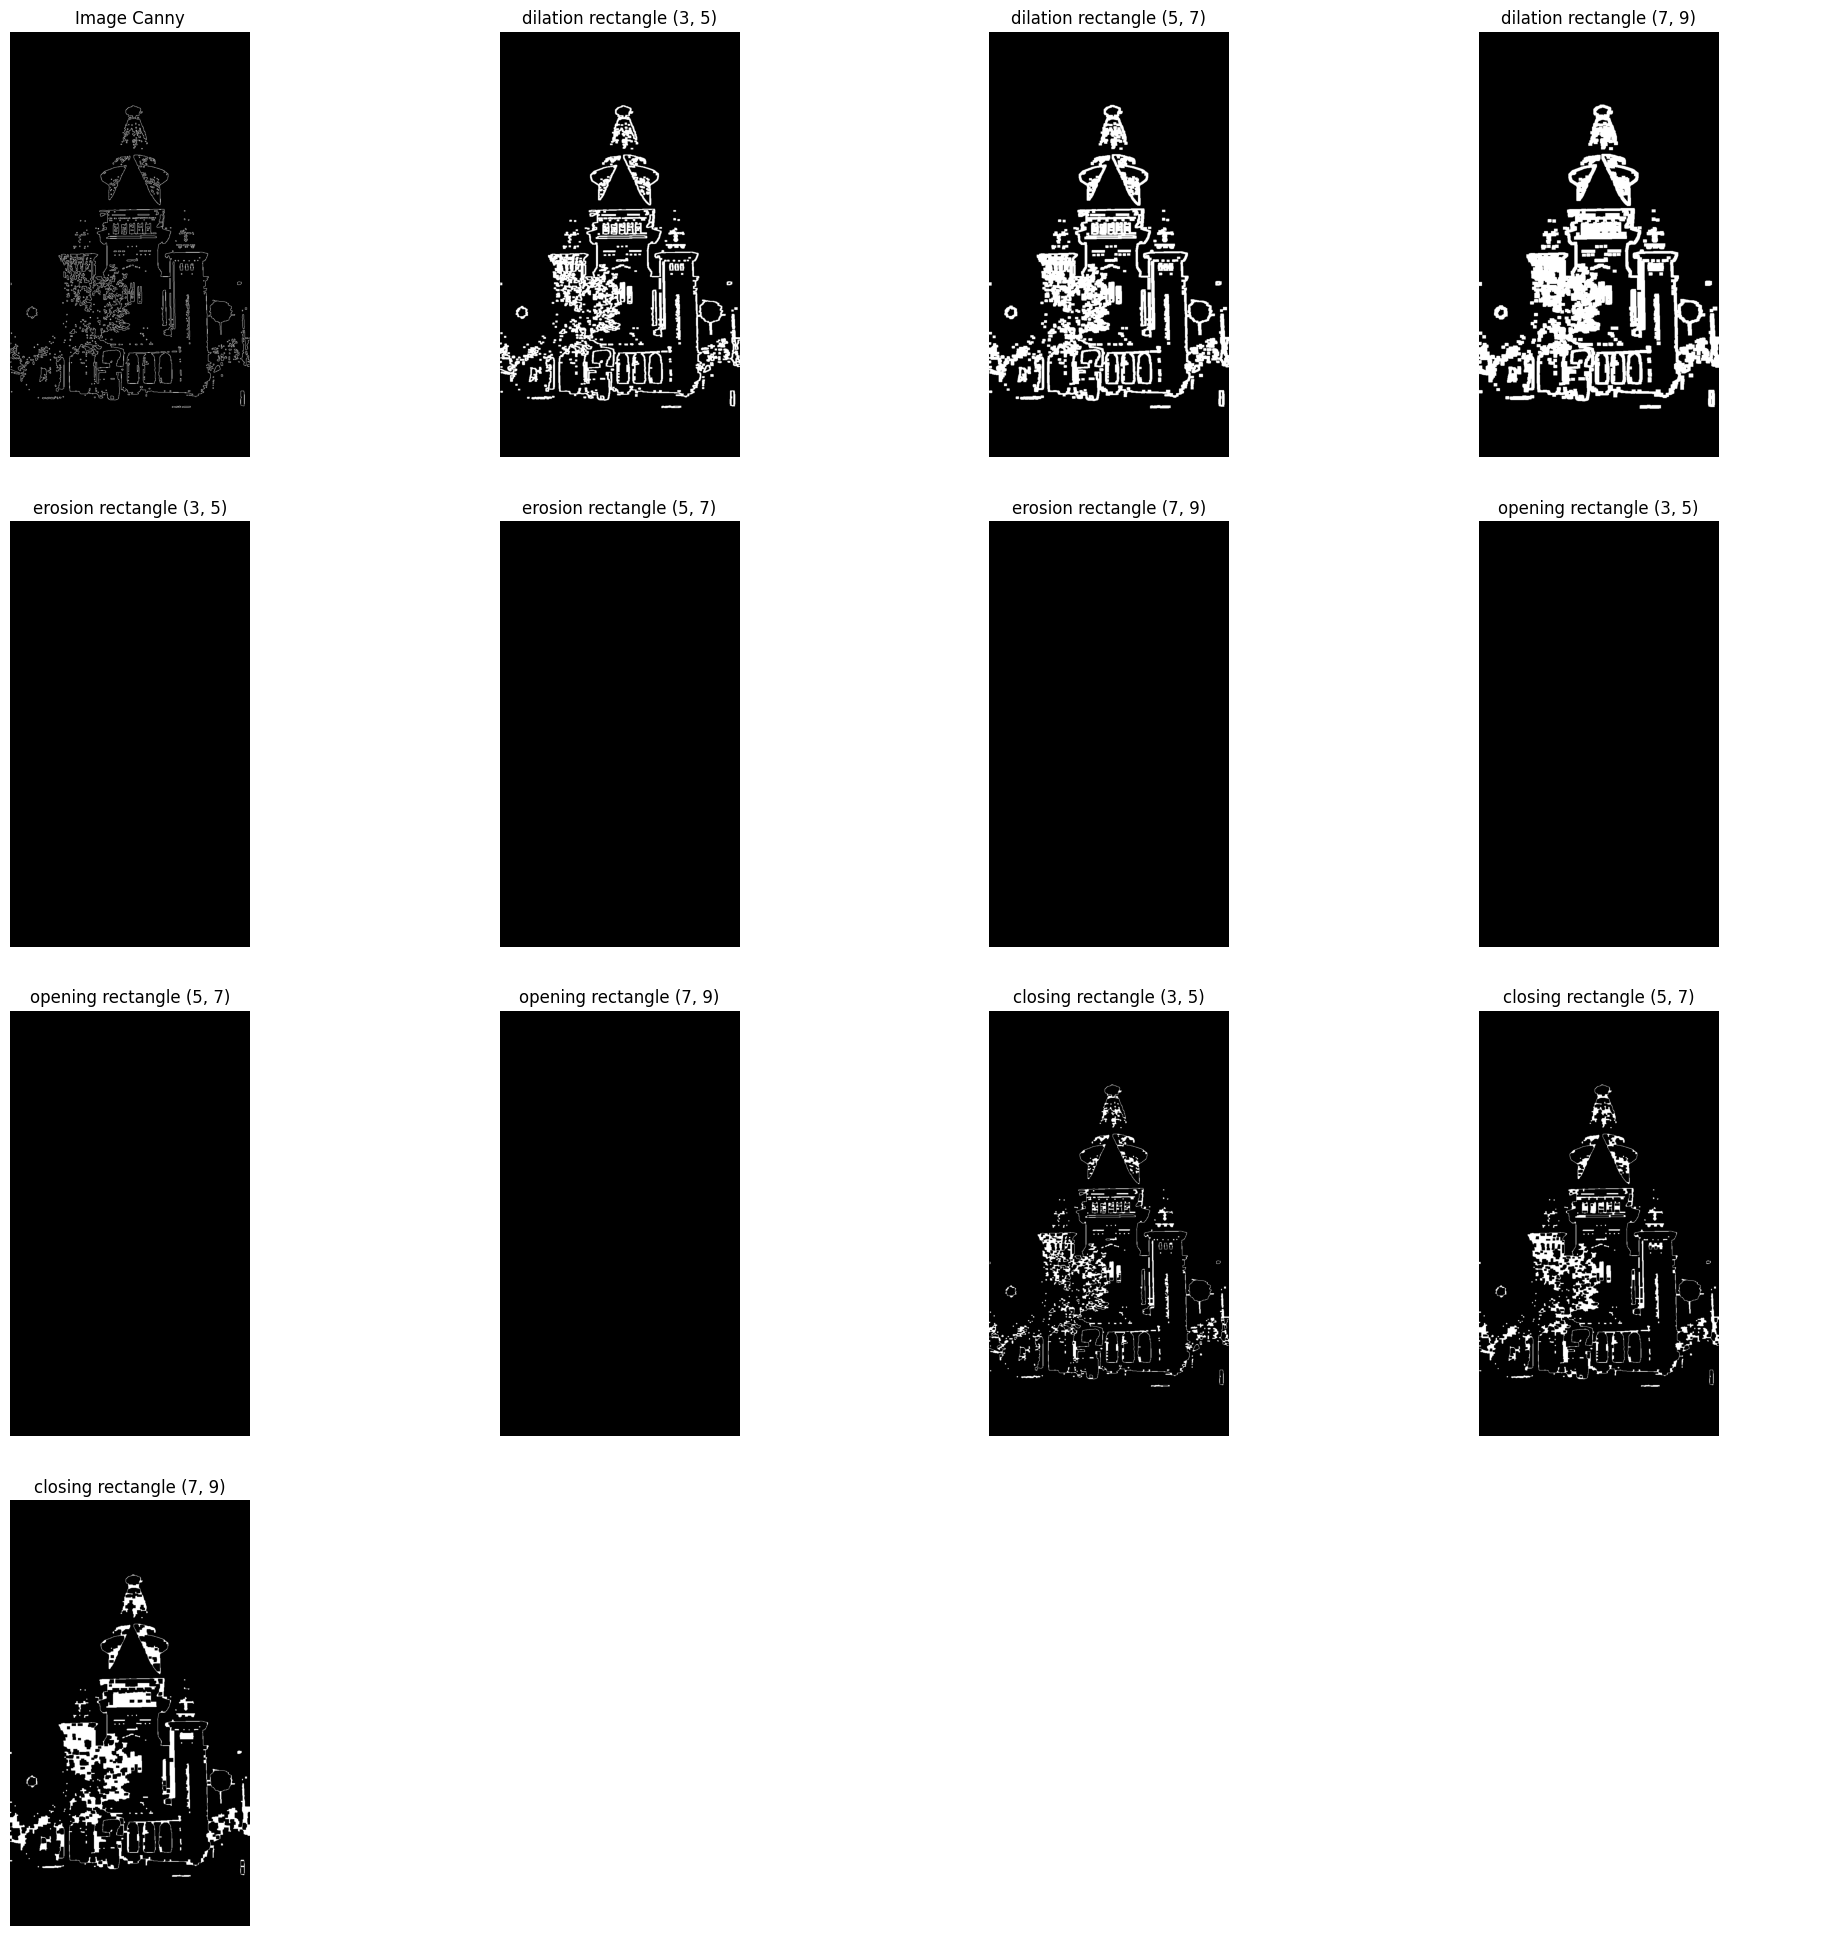

In [99]:
import numpy as np
import os
from skimage import morphology
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image

# Fonction pour charger l'image
def load_image(image_path):
    return np.array(Image.open(image_path).convert('L'))  # Convertir en niveaux de gris

# Appliquer des opérations morphologiques avec un noyau rectangulaire
def apply_morphology(image, operation="dilation", kernel_size=(3, 5)):
    """Appliquer une opération morphologique avec un noyau rectangulaire"""
    kernel = morphology.rectangle(kernel_size[0], kernel_size[1])  # Noyau rectangulaire

    if operation == "dilation":
        return morphology.dilation(image, footprint=kernel)
    elif operation == "erosion":
        return morphology.erosion(image, footprint=kernel)
    elif operation == "opening":
        return morphology.opening(image, footprint=kernel)
    elif operation == "closing":
        return morphology.closing(image, footprint=kernel)
    else:
        return image

# Charger l'image Canny (résultante de Canny)
canny_image_path = "C:/Users/admin/Desktop/important/traitement d'image/PROJET/SUR GR/best_edge_image_with_canny1.png"
canny_image = load_image(canny_image_path)

# Liste des opérations morphologiques
morph_operations = ["dilation", "erosion", "opening", "closing"]

# Liste des tailles de noyaux (nous utilisons des noyaux rectangulaires)
kernel_sizes = [(3, 5), (5, 7), (7, 9)]  # Noyaux rectangulaires avec différentes tailles

# Appliquer toutes les opérations morphologiques avec le noyau rectangulaire
result_images = []
for operation in morph_operations:
    for size in kernel_sizes:
        result_image = apply_morphology(canny_image, operation, size)
        result_images.append((operation, size, result_image))

# Calculer le nombre de lignes nécessaire pour afficher toutes les images
num_images = len(result_images) + 1  # +1 pour l'image Canny
num_cols = 4  # Nombre d'images par ligne
num_rows = (num_images // num_cols) + (num_images % num_cols > 0)  # Calculer le nombre de lignes

# Affichage de toutes les images avec 4 images par ligne
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))  # Dynamiser la taille en fonction du nombre de lignes
axes = axes.ravel()  # Aplatir les axes pour un accès facile

# Afficher l'image Canny et toutes les images morphologiques
axes[0].imshow(canny_image, cmap='gray')
axes[0].set_title("Image Canny")
axes[0].axis('off')

# Afficher les résultats morphologiques
for i, (operation, size, result_image) in enumerate(result_images):
    axes[i + 1].imshow(result_image, cmap='gray')
    axes[i + 1].set_title(f"{operation} rectangle {size}")
    axes[i + 1].axis('off')

# Supprimer les axes vides s'il y en a
for i in range(len(result_images) + 1, len(axes)):
    axes[i].axis('off')

# Ajuster les marges pour que les titres et les images soient bien visibles
plt.tight_layout(pad=3.0)  # Augmenter l'espacement entre les images
plt.show()


## **Elément structurant : ellipse**

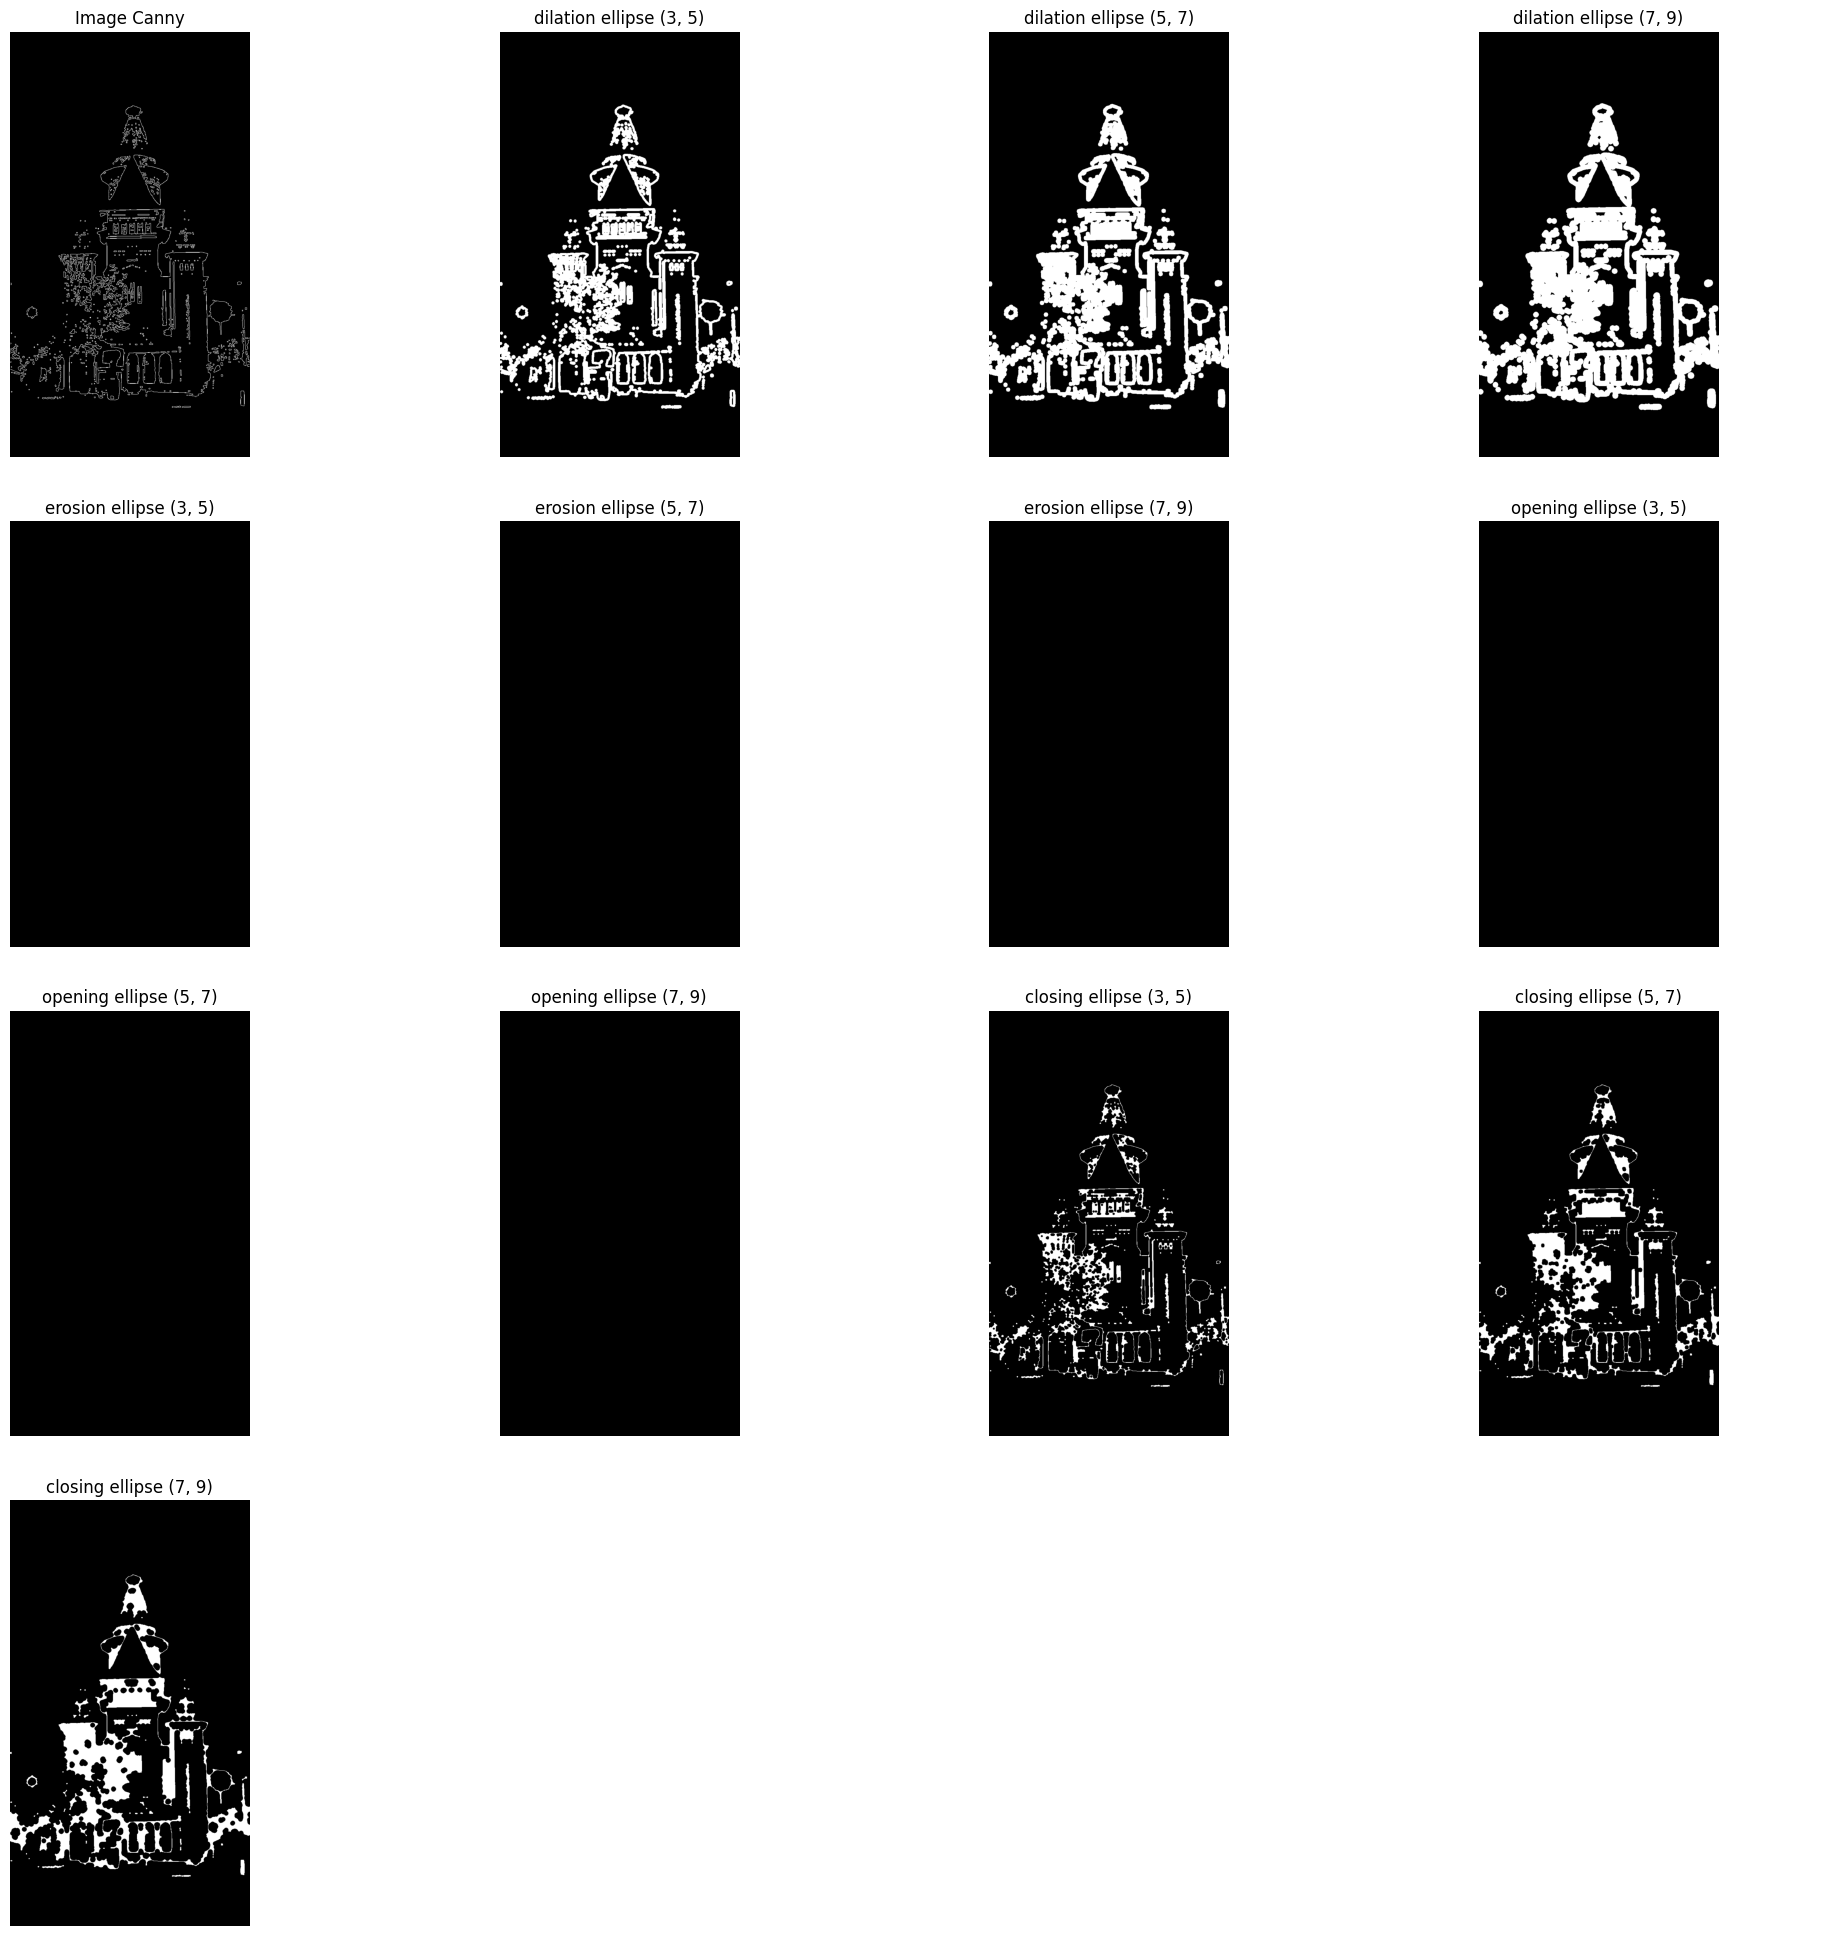

In [100]:
import numpy as np
import os
from skimage import morphology
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image

# Fonction pour charger l'image
def load_image(image_path):
    return np.array(Image.open(image_path).convert('L'))  # Convertir en niveaux de gris

# Appliquer des opérations morphologiques avec un noyau elliptique
def apply_morphology(image, operation="dilation", kernel_size=(3, 5)):
    """Appliquer une opération morphologique avec un noyau elliptique"""
    # Créer un noyau elliptique en utilisant l'élément de structure disk
    kernel = morphology.disk(kernel_size[0])  # Crée un noyau elliptique approximatif

    if operation == "dilation":
        return morphology.dilation(image, footprint=kernel)
    elif operation == "erosion":
        return morphology.erosion(image, footprint=kernel)
    elif operation == "opening":
        return morphology.opening(image, footprint=kernel)
    elif operation == "closing":
        return morphology.closing(image, footprint=kernel)
    else:
        return image

# Charger l'image Canny (résultante de Canny)
canny_image_path = "C:/Users/admin/Desktop/important/traitement d'image/PROJET/SUR GR/best_edge_image_with_canny1.png"
canny_image = load_image(canny_image_path)

# Liste des opérations morphologiques
morph_operations = ["dilation", "erosion", "opening", "closing"]

# Liste des tailles de noyaux (nous utilisons des noyaux elliptiques)
kernel_sizes = [(3, 5), (5, 7), (7, 9)]  # Noyaux elliptiques avec différentes tailles

# Appliquer toutes les opérations morphologiques avec le noyau elliptique
result_images = []
for operation in morph_operations:
    for size in kernel_sizes:
        result_image = apply_morphology(canny_image, operation, size)
        result_images.append((operation, size, result_image))

# Calculer le nombre de lignes nécessaire pour afficher toutes les images
num_images = len(result_images) + 1  # +1 pour l'image Canny
num_cols = 4  # Nombre d'images par ligne
num_rows = (num_images // num_cols) + (num_images % num_cols > 0)  # Calculer le nombre de lignes

# Affichage de toutes les images avec 4 images par ligne
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))  # Dynamiser la taille en fonction du nombre de lignes
axes = axes.ravel()  # Aplatir les axes pour un accès facile

# Afficher l'image Canny et toutes les images morphologiques
axes[0].imshow(canny_image, cmap='gray')
axes[0].set_title("Image Canny")
axes[0].axis('off')

# Afficher les résultats morphologiques
for i, (operation, size, result_image) in enumerate(result_images):
    axes[i + 1].imshow(result_image, cmap='gray')
    axes[i + 1].set_title(f"{operation} ellipse {size}")
    axes[i + 1].axis('off')

# Supprimer les axes vides s'il y en a
for i in range(len(result_images) + 1, len(axes)):
    axes[i].axis('off')

# Ajuster les marges pour que les titres et les images soient bien visibles
plt.tight_layout(pad=3.0)  # Augmenter l'espacement entre les images
plt.show()


## **Elément structurant : croix**

C:\Users\admin\AppData\Local\Temp\ipykernel_12968\3551260503.py:16: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  kernel = morphology.rectangle(kernel_size, 1)  # Noyau en forme de croix (rectangle)


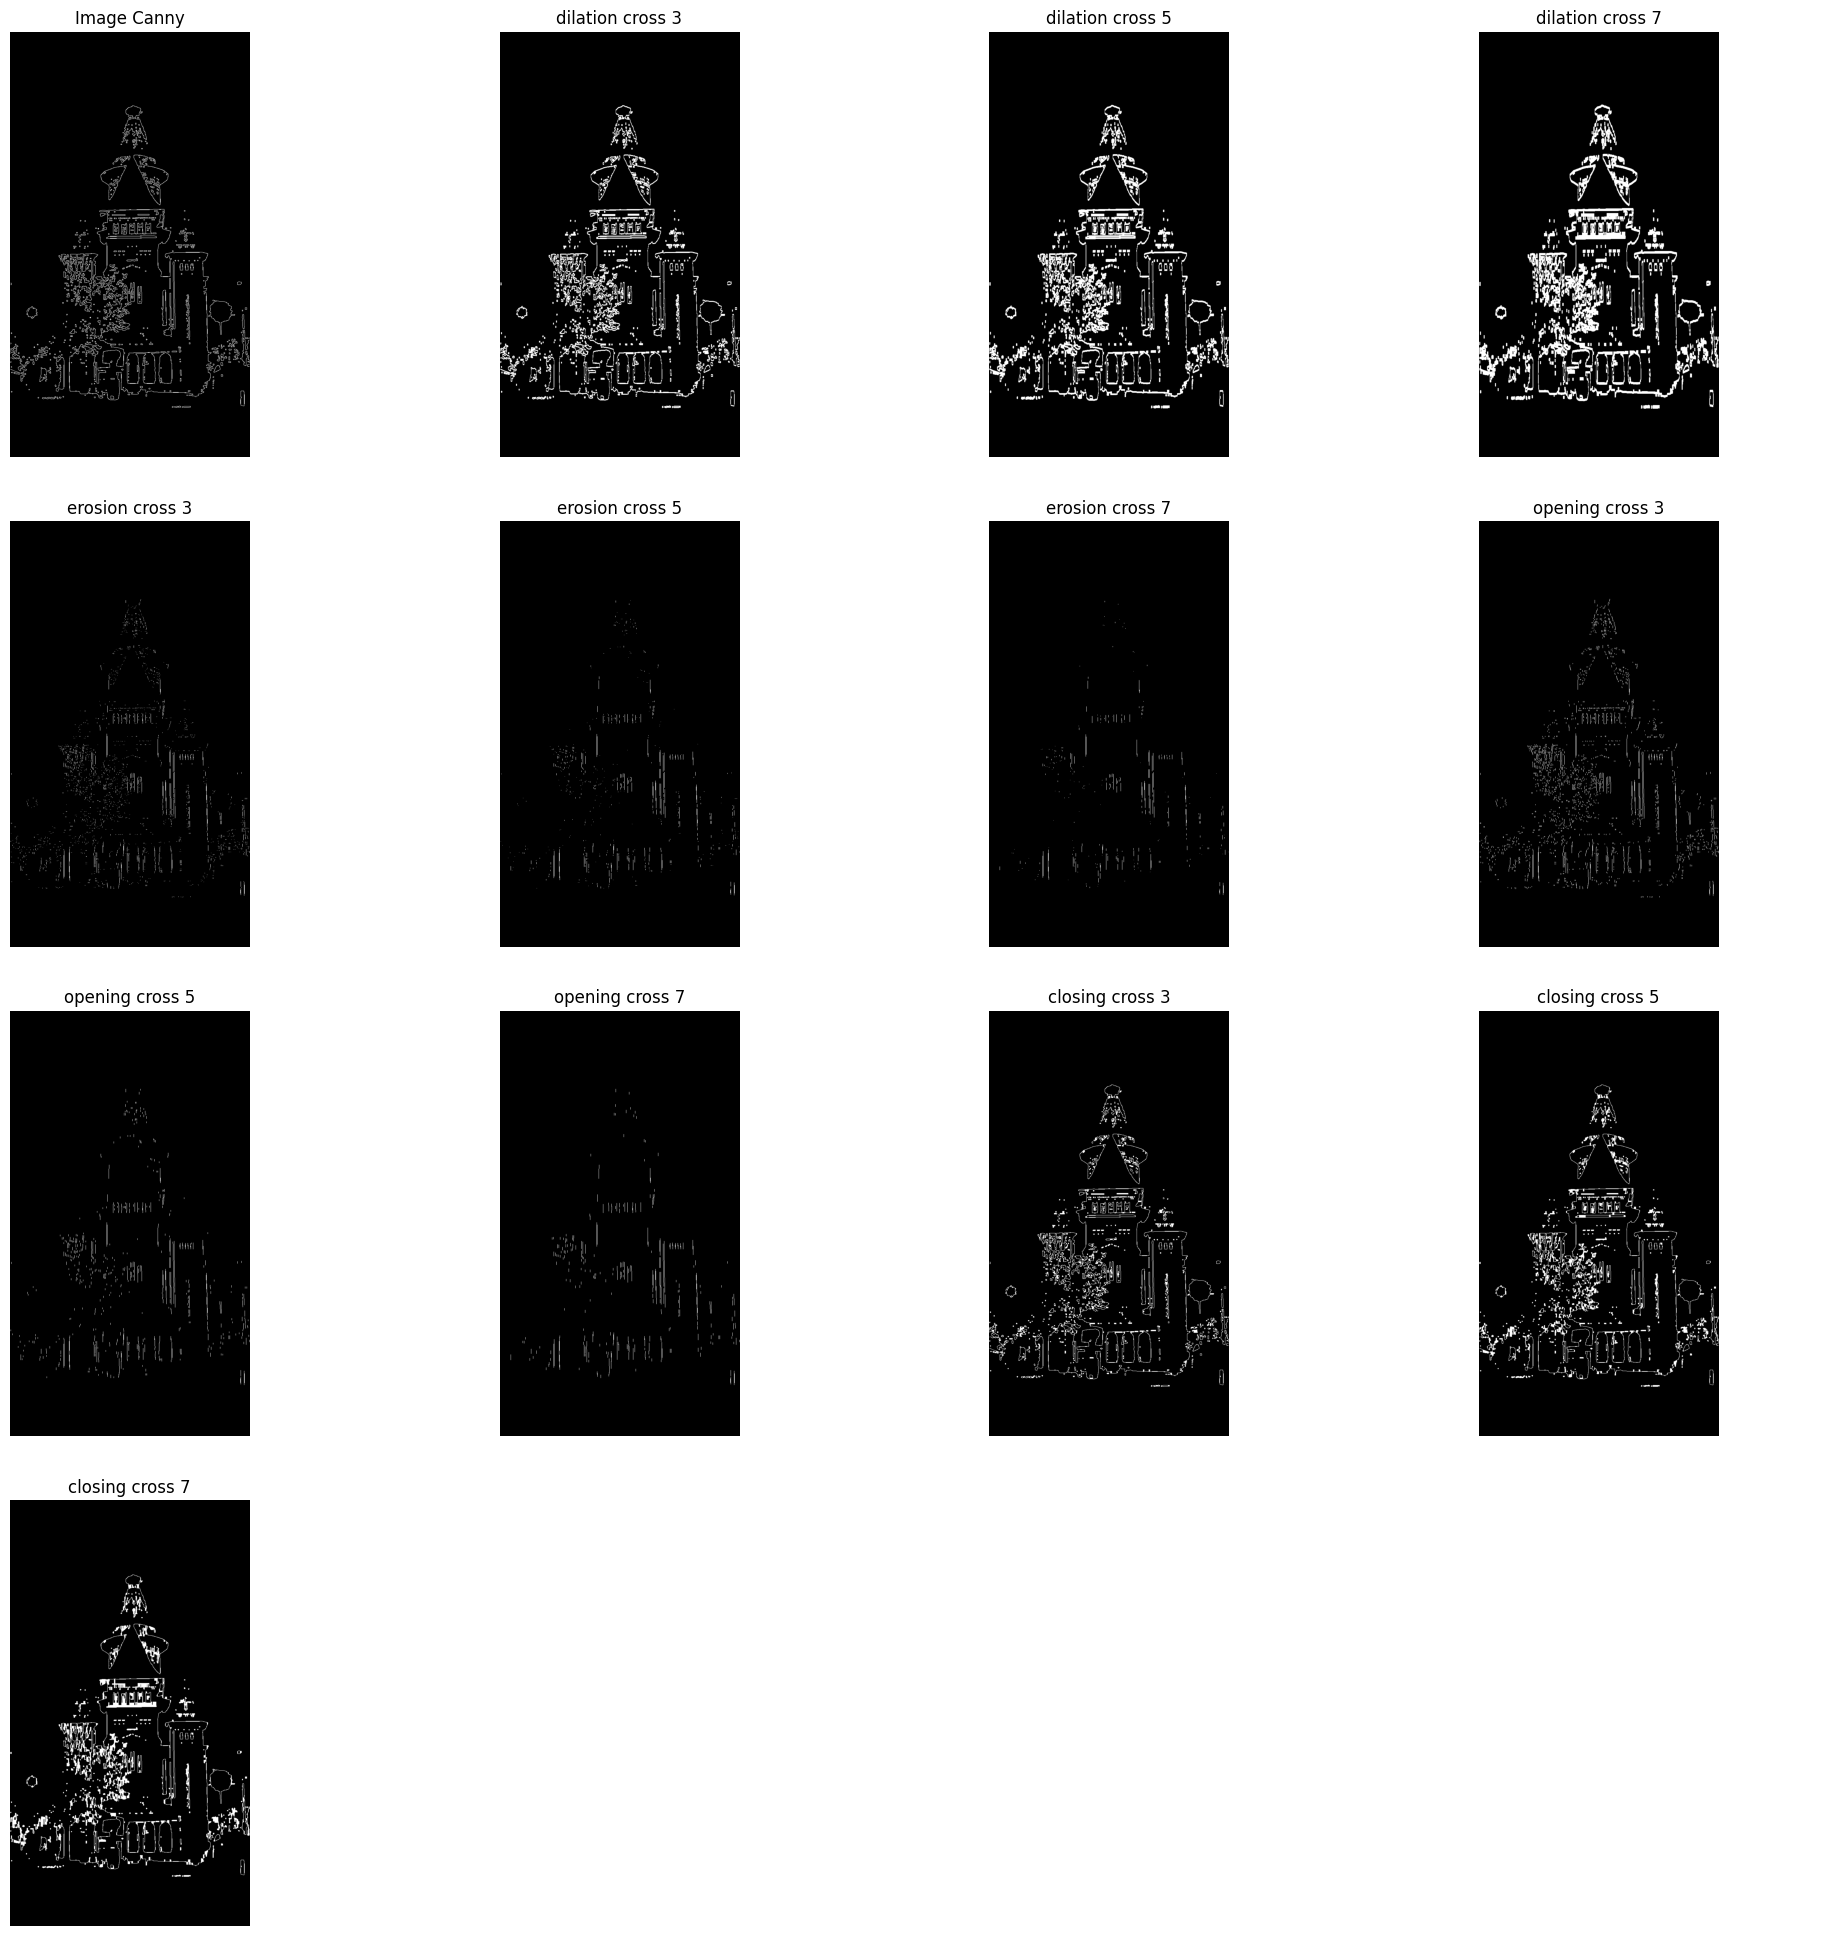

In [101]:
import numpy as np
import os
from skimage import morphology
from skimage import io
import matplotlib.pyplot as plt
from PIL import Image

# Fonction pour charger l'image
def load_image(image_path):
    return np.array(Image.open(image_path).convert('L'))  # Convertir en niveaux de gris

# Appliquer des opérations morphologiques avec un noyau en forme de croix
def apply_morphology(image, operation="dilation", kernel_size=3):
    """Appliquer une opération morphologique avec un noyau en forme de croix"""
    # Créer un noyau en forme de croix
    kernel = morphology.rectangle(kernel_size, 1)  # Noyau en forme de croix (rectangle)

    if operation == "dilation":
        return morphology.dilation(image, footprint=kernel)
    elif operation == "erosion":
        return morphology.erosion(image, footprint=kernel)
    elif operation == "opening":
        return morphology.opening(image, footprint=kernel)
    elif operation == "closing":
        return morphology.closing(image, footprint=kernel)
    else:
        return image

# Charger l'image Canny (résultante de Canny)
canny_image_path = "C:/Users/admin/Desktop/important/traitement d'image/PROJET/SUR GR/best_edge_image_with_canny1.png"
canny_image = load_image(canny_image_path)

# Liste des opérations morphologiques
morph_operations = ["dilation", "erosion", "opening", "closing"]

# Liste des tailles de noyaux (nous utilisons des noyaux de forme croix)
kernel_sizes = [3, 5, 7]  # Tailles de noyaux pour la croix

# Appliquer toutes les opérations morphologiques avec le noyau en forme de croix
result_images = []
for operation in morph_operations:
    for size in kernel_sizes:
        result_image = apply_morphology(canny_image, operation, size)
        result_images.append((operation, size, result_image))

# Calculer le nombre de lignes nécessaire pour afficher toutes les images
num_images = len(result_images) + 1  # +1 pour l'image Canny
num_cols = 4  # Nombre d'images par ligne
num_rows = (num_images // num_cols) + (num_images % num_cols > 0)  # Calculer le nombre de lignes

# Affichage de toutes les images avec 4 images par ligne
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))  # Dynamiser la taille en fonction du nombre de lignes
axes = axes.ravel()  # Aplatir les axes pour un accès facile

# Afficher l'image Canny et toutes les images morphologiques
axes[0].imshow(canny_image, cmap='gray')
axes[0].set_title("Image Canny")
axes[0].axis('off')

# Afficher les résultats morphologiques
for i, (operation, size, result_image) in enumerate(result_images):
    axes[i + 1].imshow(result_image, cmap='gray')
    axes[i + 1].set_title(f"{operation} cross {size}")
    axes[i + 1].axis('off')

# Supprimer les axes vides s'il y en a
for i in range(len(result_images) + 1, len(axes)):
    axes[i].axis('off')

# Ajuster les marges pour que les titres et les images soient bien visibles
plt.tight_layout(pad=3.0)  # Augmenter l'espacement entre les images
plt.show()


# **Résultat final :**

C:\Users\admin\AppData\Local\Temp\ipykernel_12968\3602077363.py:21: FutureWarning: `rectangle` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  kernel = morphology.rectangle(1, kernel_size) + morphology.rectangle(kernel_size, 1)


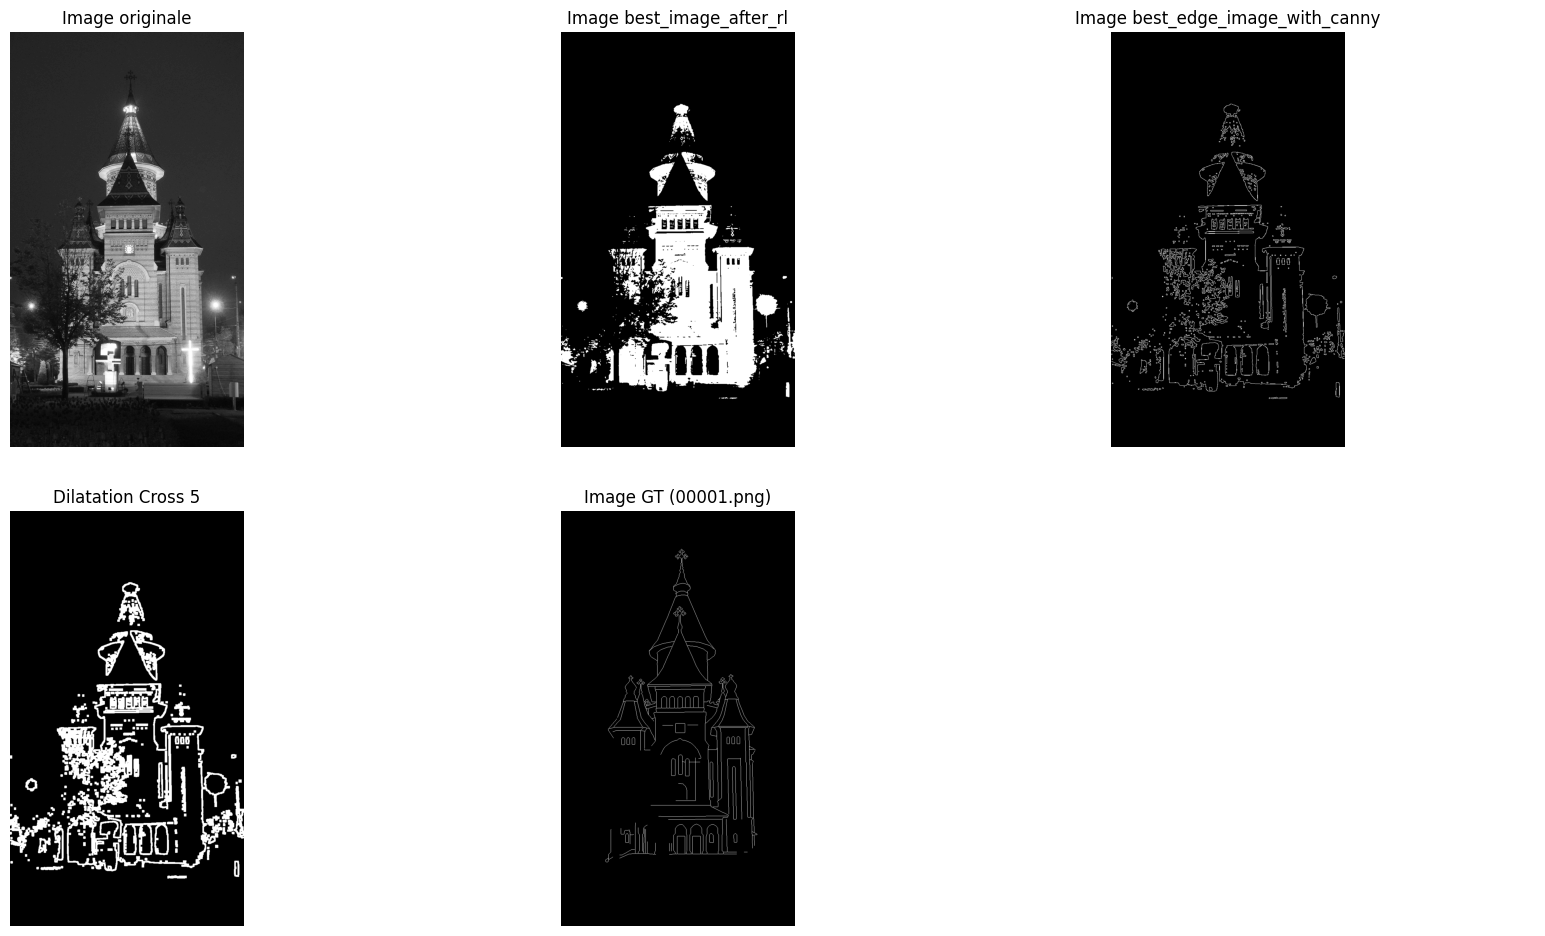

L'image dilatée avec un noyau en croix de taille 5 a été enregistrée à : C:/Users/admin/Desktop/important/traitement d'image/PROJET/SUR GR/dilated_image_cross_5.png


In [102]:
import numpy as np
import os
from skimage import io, morphology
import matplotlib.pyplot as plt
from PIL import Image

# Chemin vers le dossier d'images
aug_images_dir = "./aug_images_inter"
aug_gt_dir = "./aug_gt_edge_inter"

# Liste des fichiers dans le dossier d'images
image_files = sorted(os.listdir(aug_images_dir))
gt_files = sorted(os.listdir(aug_gt_dir))

# Charger l'image originale
def load_image(image_path):
    return np.array(Image.open(image_path).convert('L'))  # Convertir en niveaux de gris

# Appliquer une dilatation avec un noyau en croix de taille 5
def apply_dilation(image, kernel_size=5):
    kernel = morphology.rectangle(1, kernel_size) + morphology.rectangle(kernel_size, 1)
    return morphology.dilation(image, footprint=kernel)

# Charger les images
original_image_path = os.path.join(aug_images_dir, image_files[0])  # Première image dans le dossier aug_images_inter
best_image_path = "C:/Users/admin/Desktop/important/traitement d'image/PROJET/SUR GR/best_image_after_rl1.png"  # Image best_image_after_rl
best_edge_image_path = "C:/Users/admin/Desktop/important/traitement d'image/PROJET/SUR GR/best_edge_image_with_canny1.png"  # Image best_edge_image_with_canny
gt_image_path = os.path.join(aug_gt_dir, gt_files[0])  # Première image dans le dossier aug_gt_edge_inter

original_image = load_image(original_image_path)
best_image = load_image(best_image_path)
best_edge_image = load_image(best_edge_image_path)
gt_image = load_image(gt_image_path)

# Appliquer la dilatation avec un noyau en croix de taille 5
dilated_image = apply_dilation(best_edge_image, kernel_size=5)

# Affichage des images
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Affichage de l'image originale
axes[0, 0].imshow(original_image, cmap='gray')
axes[0, 0].set_title("Image originale")
axes[0, 0].axis('off')

# Affichage de l'image best_image_after_rl
axes[0, 1].imshow(best_image, cmap='gray')
axes[0, 1].set_title("Image best_image_after_rl")
axes[0, 1].axis('off')

# Affichage de l'image best_edge_image_with_canny
axes[0, 2].imshow(best_edge_image, cmap='gray')
axes[0, 2].set_title("Image best_edge_image_with_canny")
axes[0, 2].axis('off')

# Affichage de l'image dilatée avec un noyau en croix de taille 5
axes[1, 0].imshow(dilated_image, cmap='gray')
axes[1, 0].set_title("Dilatation Cross 5")
axes[1, 0].axis('off')

# Affichage de l'image GT
axes[1, 1].imshow(gt_image, cmap='gray')
axes[1, 1].set_title("Image GT (00001.png)")
axes[1, 1].axis('off')

# Supprimer le dernier axe vide
axes[1, 2].axis('off')

# Ajuster les marges pour que les titres et les images soient bien visibles
plt.tight_layout(pad=3.0)  # Augmenter l'espacement entre les images
plt.show()

# Sauvegarder l'image dilatée avec un noyau en croix de taille 5
output_dilated_image_path = "C:/Users/admin/Desktop/important/traitement d'image/PROJET/SUR GR/dilated_image_cross_5.png"
Image.fromarray((dilated_image * 255).astype(np.uint8)).save(output_dilated_image_path)

print(f"L'image dilatée avec un noyau en croix de taille 5 a été enregistrée à : {output_dilated_image_path}")
